***
# Exploratory Data Analysis
MSDS 7331-403, Lab 1  
*Jenna Ford, Edward Fry, Christian Nava, and Jonathan Tan* 
***

<a id ='Section_0'></a>

## Table of Contents

<a href='#Section_1'> 1. Preparation and Dataset Loading </a>  
<a href='#Section_2'> 2. Business Understanding </a>  
<a href='#Section_3'> 3. Data Meaning Type </a>  
<a href='#Section_4'> 4. Data Quality </a>  
<a href='#Section_4_a'> &nbsp;&nbsp;&nbsp; a. Missing Values </a>  
<a href='#Section_4_b'> &nbsp;&nbsp;&nbsp; b. Duplicate Data </a>  
<a href='#Section_4_c'> &nbsp;&nbsp;&nbsp; c. Variable Cleanup </a>  
<a href='#Section_4_c_i'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; i. Cross Street </a>  
<a href='#Section_4_c_ii'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ii. Time </a>  
<a href='#Section_4_c_iii'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; iii. Charge Description </a>  
<a href='#Section_4_c_iv'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; iv. Charge Group Code and Charge Group Description </a>  
<a href='#Section_4_c_v'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; v. Age and Arrest Type Code </a>  
<a href='#Section_4_c_vi'> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; vi. Descent Code </a>  
<a href='#Section_4_d'> &nbsp;&nbsp;&nbsp; d. Additional Attributes </a>  
<a href='#Section_4_e'> &nbsp;&nbsp;&nbsp; e. Remove Unnecessary Attributes </a>  
<a href='#Section_4_f'> &nbsp;&nbsp;&nbsp; f. Correcting Data Types </a>  
<a href='#Section_4_g'> &nbsp;&nbsp;&nbsp; g. Outliers </a>  
<a href='#Section_4_h'> &nbsp;&nbsp;&nbsp; h. Clean Dataset </a>  
<a href='#Section_5'> 5. Simple Statistics </a>  
<a href='#Section_5_a'> &nbsp;&nbsp;&nbsp; a. Arrest Type Code </a>  
<a href='#Section_5_b'> &nbsp;&nbsp;&nbsp; b. Gender </a>  
<a href='#Section_5_c'> &nbsp;&nbsp;&nbsp; c. Descent Code </a>  
<a href='#Section_5_d'> &nbsp;&nbsp;&nbsp; d. Arrest Day of the Week </a>  
<a href='#Section_5_e'> &nbsp;&nbsp;&nbsp; e. Hour </a>  
<a href='#Section_5_f'> &nbsp;&nbsp;&nbsp; f. Arrest Month </a>  
<a href='#Section_5_g'> &nbsp;&nbsp;&nbsp; g. Arrest Year </a>  
<a href='#Section_5_h'> &nbsp;&nbsp;&nbsp; h. Age </a>  
<a href='#Section_6'> 6. Visualize Attributes </a>  
<a href='#Section_6_a'> &nbsp;&nbsp;&nbsp; a. Arrest Type Code </a>  
<a href='#Section_6_b'> &nbsp;&nbsp;&nbsp; b. Descent Code </a>  
<a href='#Section_6_c'> &nbsp;&nbsp;&nbsp; c. Hour </a>  
<a href='#Section_6_d'> &nbsp;&nbsp;&nbsp; d. Age </a>  
<a href='#Section_6_e'> &nbsp;&nbsp;&nbsp; e. Reporting District </a>  
<a href='#Section_7'> 7. Explore Joint Attributes </a>  
<a href='#Section_7_a'> &nbsp;&nbsp;&nbsp; a. Age and Gender </a>  
<a href='#Section_7_b'> &nbsp;&nbsp;&nbsp; b. Age and Descent Code </a>  
<a href='#Section_7_c'> &nbsp;&nbsp;&nbsp; c. Age and Arrest Year </a>  
<a href='#Section_7_d'> &nbsp;&nbsp;&nbsp; d. Descent Code and Gender </a>  
<a href='#Section_7_e'> &nbsp;&nbsp;&nbsp; e. Gender and Arrest Day of Week </a>  
<a href='#Section_7_f'> &nbsp;&nbsp;&nbsp; f. Age, Gender, and Day of Week </a>  
<a href='#Section_7_g'> &nbsp;&nbsp;&nbsp; g. Reporting District and Gender </a>  
<a href='#Section_7_h'> &nbsp;&nbsp;&nbsp; h. Reporting District and Year </a>  
<a href='#Section_8'> 8. Explore Atttributes and Class </a>  
<a href='#Section_8_a'> &nbsp;&nbsp;&nbsp; a. Arrest Type and Reporting District </a>  
<a href='#Section_8_b'> &nbsp;&nbsp;&nbsp; b. Arrest Types over Time </a>  
<a href='#Section_8_c'> &nbsp;&nbsp;&nbsp; c. Arrest Type, Age, and Gender </a>  
<a href='#Section_8_d'> &nbsp;&nbsp;&nbsp; d. Arrest Type, Day of Week, and Gender </a>  
<a href='#Section_8_e'> &nbsp;&nbsp;&nbsp; e. Arrest Type, and Gender </a>  
<a href='#Section_8_f'> &nbsp;&nbsp;&nbsp; f. Arrest Type, Gender, and Descent Code </a>  
<a href='#Section_8_g'> &nbsp;&nbsp;&nbsp; g. Gender and Ethnicity </a>  
<a href='#Section_9'> 9. New Features </a>  
<a href='#Section_9_a'> &nbsp;&nbsp;&nbsp; a. Derived Data </a>  
<a href='#Section_9_b'> &nbsp;&nbsp;&nbsp; b. Possible Data Additions </a>  
<a href='#Section_10'> 10. Exceptional Work </a>  
<a href='#Section_10_a'> &nbsp;&nbsp;&nbsp; a. Demographic Breakdown of Arrests </a>  
<a href='#Section_10_b'> &nbsp;&nbsp;&nbsp; b. Logistic Regression </a>  

<a id = 'Section_1'></a>

## 1. Preparation and Dataset Loading

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from plotly.offline import iplot_mpl

# Creating training and test sets
import sklearn

# Geospacial plotting
import geopandas as gpd
import json
from bokeh.io import curdoc, output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, Slider, HoverTool
from bokeh.palettes import brewer
from bokeh.layouts import widgetbox, row, column

# File system management
import os.path

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [3]:
# Constants
DATAPATH_BASE = 'https://machinelearningi.blob.core.windows.net/group-project/'
DATAPATH_SAS_TOKEN = '?sv=2019-02-02&ss=bfqt&srt=sco&sp=rwdlacup&se=2020-04-27T11:12:37Z&st=2020-01-23T04:12:37Z&spr=https&sig=jpIpjrp8dIg9eyUyPpmgTe5yj9i1ZoCSru5kBVHcUO8%3D'
DATAPATH_FILENAME = 'Arrest_Data_from_2010_to_Present.csv'

# Fully qualified paths ready to use
DATA_SOURCE = "".join([DATAPATH_BASE, DATAPATH_FILENAME, DATAPATH_SAS_TOKEN])

# Options
pd.set_option('float_format', '{:.2f}'.format)  # Reign in the scientific notation for reasonable values

# Load data for analysis; only read if needed because the import can take a long time
try:
    if len(df.index) < 1:
        df_raw = pd.read_csv(DATA_SOURCE) # If we get here, the dataframe was empty
except:   
    df_raw = pd.read_csv(DATA_SOURCE) # If we get here, the dataframe did not exist
    

In [4]:
# make copy of dataset
df = df_raw

# Create a copy of the dataset before any filtering, for use in a later graph
df2 = df.copy() 

print("The dataset has {:,} rows and {:,} columns".format(*df.shape))

The dataset has 1,326,626 rows and 17 columns


<a href='#Section_0'> Back to top </a>
<a id = 'Section_1'></a><a id = 'Section_2'></a>

## 2. Business Understanding

We have chosen to use a dataset comprising of Los Angeles arrest incidents dating back to 2010. We obtained the data from the [City of Los Angeles open data](https://data.lacity.org/A-Safe-City/Arrest-Data-from-2010-to-Present/yru6-6re4). This dataset contains information about the date, time and location of the incident, demographic data of the person arrested, and information about the type of incident. We pulled the data on January 12, 2020. This is important to note because the dataset is updated weekly.

While the purpose of the dataset was not specified in the information available to us, we have chosen to classify the multi-nomial categorical variable `Arrest Type Code` (Felony, Misdemeanor, etc.). We feel that being able to classify arrest type could help in prioritizing dispatch calls, especially when there are more calls than officers available to respond. We assume that arrest type is an indicator of the severity of the incident. It is also worth noting that most of the data available for the classification would be available to the dispatcher. For example, someone placing a call to 911 would most likely have a basic description of the offender such as gender, approximate age and ethnicity. The caller would also know the location of the incident and have a brief description of the situation. 

We will train our classification model using cross validation and measure effectiveness by looking at accuracy. `Arrest Type Code` has 4 distinct values, indicating a 25% chance of picking the correct arrest type at random. A successful model would ideally exceed the ability of a dispatcher to correctly identify the arrest type. However, we do not have data available for this. To be considered effective, the model should significantly outperform random chance, so we will use accuracy of 75% as the cut-off for identifying if the model is successful.


<a href='#Section_0'> Back to top </a>
<a id = 'Section_3'></a>

## 3. Data Meaning Type

The arrest dataset consists of 17 attributes. Attribute descriptions are provided by the [City of Los Angeles open data](https://data.lacity.org/A-Safe-City/Arrest-Data-from-2010-to-Present/yru6-6re4) and [Kaggle](https://www.kaggle.com/cityofLA/los-angeles-crime-arrest-data). Descriptions are displayed in Table 1 below:

**Table 1: Arrest Dataset - Attribute Descriptions**

| Attribute | Description |
| :--- | :--- |
| **Report ID** | Unique ID for the arrest |
| **Arrest Date** | Date in MM/DD/YYYY format |
| **Time** | In 24-hour military time |
| **Area ID** | The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21. (Also called Precincts). |
| **Area Name** | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| **Reporting District** | A four-digit code that represents a sub-area within a Geographic Area. All arrest records reference the "RD" that it occurred in for statistical comparisons. |
| **Age** | Two character numeric.|
| **Sex Code** | F - Female; M - Male|
| **Descent Code** | Descent Code: A - Other Asian; B - Black; C - Chinese; D - Cambodian; F - Filipino; G - Guamanian; H - Hispanic/Latin/Mexican; I - American Indian/Alaskan Native; J - Japanese; K - Korean; L - Laotian; O - Other; P - Pacific Islander S - Samoan; U - Hawaiian; V - Vietnamese; W - White; X - Unknown; Z - Asian Indian |
| **Charge Group Code** | Category of arrest charge. This is a grouping of the "Charge" field below.|
| **Charge Group Description** | Defines the Charge Group Code provided. |
| **Arrest Type Code** | A code to indicate the type of charge the individual was arrested for. D - Dependent; F - Felony; I - Infraction; M - Misdemeanor; O - Other |
| **Charge** | The charge the individual was arrested for. |
| **Charge Description** | Defines the Charge provided. |
| **Address** | Street address of crime incident rounded to the nearest hundred block to maintain anonymity. |
| **Cross Street** | Cross Street of rounded Address. |
| **Location** | The location where the crime incident occurred. Actual address is omitted for confidentiality. XY coordinates reflect the nearest 100 block. |



As part of our analysis, we also use geospatial files for reporting districts. These files are provided by [LA City GeoHub](http://geohub.lacity.org/datasets/4398360b1a0242b78904f46b3786ae73_0). Several fields are available in these files, in addition to geometry. We join the datasets together using `Reporting District` and `REPDIST` as the key.

**Table 2: Geospatial Datasets - Attribute Descriptions**

| Attribute | Description |
| :--- | :--- |
| **BUREAU** | LAPD Bureau (collection of Precincts). |
| **PREC** | 2-digit Precinct code (collection of Reporting Districts). |
| **REPDIST** | 4-digit Reporting Ristrict code. |

Data types for the raw arrest incident dataset are found below. Several variables are of the wrong data type and will be corrected in the section below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326626 entries, 0 to 1326625
Data columns (total 17 columns):
Report ID                   1326626 non-null int64
Arrest Date                 1326626 non-null object
Time                        1326430 non-null float64
Area ID                     1326626 non-null int64
Area Name                   1326626 non-null object
Reporting District          1326626 non-null int64
Age                         1326626 non-null int64
Sex Code                    1326626 non-null object
Descent Code                1326626 non-null object
Charge Group Code           1236932 non-null float64
Charge Group Description    1236403 non-null object
Arrest Type Code            1326626 non-null object
Charge                      1326626 non-null object
Charge Description          1237058 non-null object
Address                     1326626 non-null object
Cross Street                755607 non-null object
Location                    1326626 non-null object
dtypes

<a href='#Section_0'> Back to top </a>
<a id = 'Section_4'></a>

## 4. Data Quality

Data quality is of concern for the arrest incident data, primarily because this data is transcribed from arrest reports. The source of the data notes that there are also fields with missing values. 

The table below quickly highlights a formatting issue with `Time`, missing data issues with `Charge Group Description`, `Charge Description` and `Cross Street`, and an issue with `Age` (value of 2 seen in first 5 rows - it is unlikely that toddlers are criminal offenders). A detailed analysis of duplicate data, missing data and outliers follows. We also note how we handle issues that we found.


In [6]:
df.head()

Report ID Arrest Date    Time  Area ID   Area Name  Reporting District  \
0  191811472  05/03/2019 1700.00       18   Southeast                1802   
1    5614161  04/29/2019 1040.00        8     West LA                 842   
2    5806609  11/23/2019 1830.00        4  Hollenbeck                 457   
3    5615197  04/30/2019  615.00        6   Hollywood                 663   
4    5615701  04/30/2019 1100.00        9    Van Nuys                 901   

   Age Sex Code Descent Code  Charge Group Code Charge Group Description  \
0   23        F            B                nan                      NaN   
1   41        M            H               3.00                  Robbery   
2   23        F            H               3.00                  Robbery   
3   27        M            O               5.00                 Burglary   
4    2        F            H                nan                      NaN   

  Arrest Type Code     Charge Charge Description  \
0                M  653.22 PC                NaN   
1                F      211PC            ROBBERY   
2                F      211PC            ROBBERY   
3                F      459PC           BURGLARY   
4                D  300(B)WIC                NaN   

                                    Address                     Cross Street  \
0                                      91ST                         FIGUEROA   
1  11600    WILSHIRE                     BL                              NaN   
2                                   FICKETT                       CINCINNATI   
3                                   LA BREA                        LEXINGTON   
4                                    RAYMER  SEPULVEDA                    BL   

               Location  
0  (33.9543, -118.2827)  
1  (34.0508, -118.4592)  
2  (34.0477, -118.2047)  
3  (34.0907, -118.3384)  
4  (34.2149, -118.4674)

The information provided below shows the data type for each attribute, in addition to indicating if there are missing values. `Time` needs to be stored as a time value, instead of float64. `Area ID` and `Reporting District`, while comprised of numerical digits, are categorical variables and need to be stored as such.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326626 entries, 0 to 1326625
Data columns (total 17 columns):
Report ID                   1326626 non-null int64
Arrest Date                 1326626 non-null object
Time                        1326430 non-null float64
Area ID                     1326626 non-null int64
Area Name                   1326626 non-null object
Reporting District          1326626 non-null int64
Age                         1326626 non-null int64
Sex Code                    1326626 non-null object
Descent Code                1326626 non-null object
Charge Group Code           1236932 non-null float64
Charge Group Description    1236403 non-null object
Arrest Type Code            1326626 non-null object
Charge                      1326626 non-null object
Charge Description          1237058 non-null object
Address                     1326626 non-null object
Cross Street                755607 non-null object
Location                    1326626 non-null object
dtypes

<a id = 'Section_4_a'></a>

### a. Duplicate Data

We want to make sure we have unique observations, i.e., no two records have the same values for all attributes. This will reduce the risk of biased estimates. In this dataset a duplicate record would lead to further inspection as it is unlikely two arrests were made in the exact same location, on the same date and time, for the same charge, for two individuals of the same age, gender, and ethnic descent. A check for duplicate records verifies our dataset contains unique observations.  

In [8]:
# check for duplicate records
df.duplicated().sum()

0

<a href='#Section_0'> Back to top </a>
<a id = 'Section_4_b'></a>

### b. Missing Values

The table below shows how many observations have missing values by column and the percentage of values that are missing. How we handle missing values for each attribute is explored in the sections below.

In [9]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis = 1, keys = ['Missing Values', '% of Total  Values'])

In [10]:
missing_data(df)

Missing Values  % of Total  Values
Cross Street                      571019               43.04
Charge Group Description           90223                6.80
Charge Group Code                  89694                6.76
Charge Description                 89568                6.75
Time                                 196                0.01
Location                               0                0.00
Reporting District                     0                0.00
Arrest Date                            0                0.00
Area ID                                0                0.00
Area Name                              0                0.00
Descent Code                           0                0.00
Age                                    0                0.00
Sex Code                               0                0.00
Arrest Type Code                       0                0.00
Charge                                 0                0.00
Address                                0                0.00
Report ID                              0                0.00

<a href='#Section_0'> Back to top </a>
<a id = 'Section_4_c'></a>

### c. Variable Cleanup

<a id = 'Section_4_c_i'></a>

#### i. Cross Street

43% of observations have missing data for the `Cross Street` attribute. Due to the other location based data available (`Area ID` and `Reporting District`) and the percentage of missing values for `Cross Street`, we have decided to not use `Cross Street`. We drop the column below.

In [11]:
# remove Cross Street column
df.drop(['Cross Street'], axis=1, inplace=True)

<a id = 'Section_4_c_ii'></a>

#### ii. Time

There are 196 observations are missing for `Time`. The statistics provided below highlight another issue: the presence of 24:00. A value of 24:00 is an issue because the 24-hour clock goes to 23:59 and then starts over at 00:00. In addition, the source notes that 00:00 may be filled in for missing data, so any records with 00:00 for `Time` are suspect. 

In [12]:
df.Time.describe().apply(lambda x: '%.1f' % x) # gets stats for Time variable and formats to 1 decimal place

count    1326430.0
mean        1386.8
std          662.9
min            0.0
25%          945.0
50%         1510.0
75%         1930.0
max         2400.0
Name: Time, dtype: object

Upon further inspection, we found there were 3 observations where `Time` is 0.0 and 102 where `Time` is 24.0.

In [13]:
# select rows where Time = 0
df.loc[df['Time']== 0].shape

(3, 16)

In [14]:
# select rows where Time = 24
df.loc[df['Time']== 24].shape

(102, 16)

We will treat 0.0 and NaN values as missing. Due to the large number of records in the dataset we have chosen to filter these out of the data instead of imputing them to another value. We replaced 00:00 with 24:00 due to the reasonable assumption that these values are equal.

The code below filters out 0.0 and missing values, replaces 00:00 with 24:00, and corrects the format of `Time` from (H)HMM to HH:MM.

In [15]:
#filter out 0 and missing
df = df[df['Time'] != 0]
df['Time'] = df['Time'].astype(str) 
df = df[df['Time'] != 'nan']

# Convert float to string. Get rid of decimals. Replace missing or invalid values with '0000'.
df['Time'] = df['Time'].astype(str).str.split(".", expand = True)[0].replace(to_replace = ['2400','nan'], value = '0000') 

# Fill time column with leading zeros to have 4 characters total
df['Time'] = df['Time'].apply(lambda x: '{0:0>4}'.format(x))

# Add colon to Time values by converting attribute to a datetime variable 
df['Time'] = pd.to_datetime(df['Time'], format = '%H%M').dt.time

print("The data set has {:,} rows and {:,} columns after filtering on Time.".format(*df.shape))

The data set has 1,326,427 rows and 16 columns after filtering on Time.


<a href='#Section_0'> Back to top </a>
<a id = 'Section_4_c_iII'></a>

#### iii. Charge Description

`Charge Description` has 2,371 different charge descriptions and 89,568 missing values (from [Section 4 B](#Section_4_b) above). At this point, we feel this type of data is too granular, especially since there are a number of charges that have only 1 arrest incident identified. In the code below, we drop this column and the associated column `Charge`.

In [16]:
#print the number of unique Charge Descriptions found in the dataset
print(df['Charge Description'].nunique())

# remove Charge Description and Charge columns
df.drop(['Charge Description'], axis=1, inplace=True)
df.drop(['Charge'], axis=1, inplace=True)

2371


<a id = 'Section_4_c_iv'></a>

#### iv. Charge Group Code and Charge Group Description

`Charge Group Code` has 89,694 missing values and `Charge Group Description` has 90,223 missing values (from [Section 4 B](#Section_4_b) above). These columns bring valuable information to our objective of classifying `Arrest Type Code`. However, there are charge groups that are only associated with one arrest type. It is also a valid scenario where the caller may not have enough information for the dispatcher to determine the charge group (missing values). In the scenario of a dispatcher prioritizing calls, we want to be able to use the information available to create the best classification. 

For now, we are choosing to leave the missing values for `Charge Group Code` in the dataset. In the code below we drop `Charge Group Description` because of its relationship with `Charge Group Code`. We do not need both in any model we build.

In [17]:
# Remove Charge Description and Charge columns
df.drop(['Charge Group Description'], axis=1, inplace=True)

<a href='#Section_0'> Back to top </a>
<a id = 'Section_4_c_v'></a>

#### v. Age and Arrest Type Code

There were no missing values for `Age`. However, there are data entry errors that need to be addressed. The plot below shows the relationship between arrest type and age. The age distribution for the Dependent arrest type is of concern. There are arrests for children as young as 0. It is unclear if an `Age` value of 0 indicates taking a child who is less than one year old into protective custody or if it indicates a missing value. That is especially true for records with an arrest charge not associated with the Welfare and Institutions Code (WIC). Additionally, there is an overlap in ages for the Dependent arrest type and the other arrest types, which further complicates the issue. 

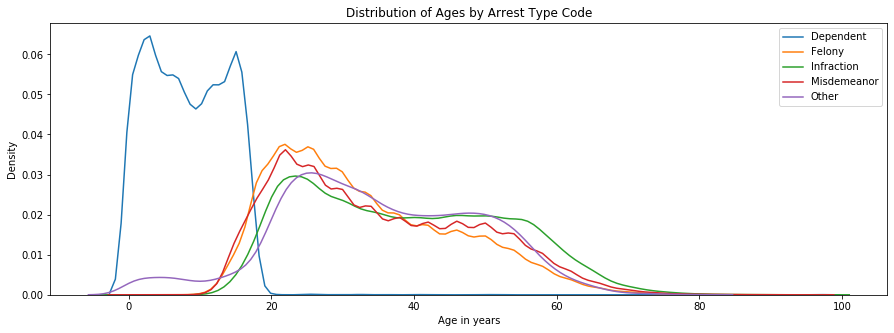

In [18]:
plt.figure(figsize = (15, 5))

# KDE Plot of Dependent Arrest Code
sns.kdeplot(df.loc[df['Arrest Type Code'] == 'D', 'Age'], label = 'Dependent')

# KDE plot of Felony Arrest Code                   
sns.kdeplot(df.loc[df['Arrest Type Code'] == 'F', 'Age'], label = 'Felony')

# KDE plot of Infraction Arrest Code                   
sns.kdeplot(df.loc[df['Arrest Type Code'] == 'I', 'Age'], label = 'Infraction')

# KDE plot of Misdemeanor Arrest Code                   
sns.kdeplot(df.loc[df['Arrest Type Code'] == 'M', 'Age'], label = 'Misdemeanor')

# KDE plot of Other Arrest Code                   
sns.kdeplot(df.loc[df['Arrest Type Code'] == 'O', 'Age'], label = 'Other')

# Labels
plt.xlabel('Age in years'); plt.ylabel('Density'); plt.title('Distribution of Ages by Arrest Type Code');

In [19]:
#create a function to count by column and display percentages
def count_percent(data,field):
    df_grouped = data.groupby(by=field)
    c1 = (df_grouped[field].count())

    c2  = []#create empty list to store percentages
    for x in c1:
        c2.append("{:.2%}".format((x/sum(c1)))) #row value divided by total, formatted as percent, store in list
    c1 = pd.DataFrame(c1) #needs dataframe to start with, then can add new column from list c2
    c1['Percent']= c2
    c1.columns = ['Count','Percent']
    return c1

Per the output below, only 0.84% of arrest incidents have a D-Dependent arrest type. This leaves us with 99.16% of records available for further inspection.

In [20]:
count_percent(df,'Arrest Type Code')

Count Percent
Arrest Type Code                
D                  11197   0.84%
F                 423720  31.94%
I                  56067   4.23%
M                 806865  60.83%
O                  28578   2.15%

Due to the uncertainty of valid data for young ages, we have picked an age cutoff of 16 and will drop any arrest incident with an age of less than 16. Since the majority of Dependent arrest incidents occur with an age of approximately 16 or less, we have chosen to remove Dependent arrests from the dataset.

In [21]:
# Drop the observations where Age is less than 16
df.drop(df[df['Age'] < 16].index, inplace = True) 

# Drop the observations where Arrest Type Code = 'D'
df.drop(df[df['Arrest Type Code'] == 'D'].index, inplace = True) 

print("The data set has {:,} rows and {:,} columns after filtering on Age and Arrest Type Code.".format(*df.shape))

The data set has 1,278,805 rows and 13 columns after filtering on Age and Arrest Type Code.


After removing thes records we are left with 1,278,805 records or approximately 96.4% of the original records.

<a href='#Section_0'> Back to top </a>
<a id = 'Section_4_c_vi'></a>

#### vi. Descent Code

Below is a table of arrests by `Descent Code`. There are 4 primary descents represented in the data: B - Black 29.0% of arrests, H - Hispanic 45.9% of arrests, O - Other 5.2% of arrests, and W - White 19.3% of arrests. These 4 descents represent 99.3% of all arrests. As such, we have chosen to re-classify the remaining 0.7% of arrests into O - Other. 

In [22]:
count_percent(df,'Descent Code')

Count Percent
Descent Code                
A               5265   0.41%
B             370156  28.95%
C                832   0.07%
D                  2   0.00%
F                867   0.07%
G                 53   0.00%
H             586356  45.85%
I                276   0.02%
J                164   0.01%
K               1092   0.09%
L                  6   0.00%
O              67033   5.24%
P                172   0.01%
S                 10   0.00%
U                  7   0.00%
V                 16   0.00%
W             246384  19.27%
X                107   0.01%
Z                  7   0.00%

Reclassifying increases `Descent Code` O - Other from 5.2% of all arrests to 5.9%.

In [23]:
# Re-classify any descent not in (B,H,O,W) into 0
descent_list = ['B','H','O','W']
df['Descent Code'] = np.where(np.isin(df['Descent Code'],descent_list),df['Descent Code'],'O')

count_percent(df,'Descent Code')

Count Percent
Descent Code                
B             370156  28.95%
H             586356  45.85%
O              75909   5.94%
W             246384  19.27%

<a href='#Section_0'> Back to top </a>
<a id = 'Section_4_d'></a>

### d. Additional Attributes

We create a new attribute `Hour` to use in our model since using minutes seems unnecessary for our purpose of helping classify arrest types. We drop `Time` considering this.

We would like to investigate whether day of the week, month and year have an impact on arrests. Below, we create individual columns for easier analysis. We drop `Arrest Date` because any patterns we find will be related to day of the week, month and/or year.

In [24]:
# Get hour
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

# Drop Time
df.drop(['Time'], axis=1, inplace=True)

# Convert Arrest Date to datetime
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'])

# Extract year, month, and day of week and add to dataframe as new attributes
df['arrest_year']= df['Arrest Date'].dt.year
df['arrest_month']= df['Arrest Date'].dt.month
df['arrest_day_of_week'] = df['Arrest Date'].dt.weekday_name

# Drop Arrest Date
df.drop(['Arrest Date'], axis=1, inplace=True)

<a href='#Section_0'> Back to top </a>
<a id = 'Section_4_e'></a>

### e. Remove Unecessary Attributes

While cleaning up the data we have already dropped `Cross Street`, `Charge Description`, `Charge`, `Charge Group Description`, `Time` and `Arrest Date`. 

`Report ID` is a unique identifier for each arrest incident. As such, this attribute is not useful for our analysis and will be removed.

`Address` provides the address of the incident to the nearest 100th block. This data is generated from a free-form text field on the original arrest incident. There are several issues related to this such as spellings mistakes, using the wrong suffix (St., Dr., etc.), and incorrectly identifying the block. We feel that using `Reporting District` and `Area ID` will narrow down the location of the arrest incident sufficiently for our purposes. As such, we drop `Address` as well.

`Area Name` and `Area ID` give the same information. We will keep `Area ID` and drop `Area Name`.

In [25]:
# remove columns
df.drop(['Report ID'], axis=1, inplace=True)
df.drop(['Address'], axis=1, inplace=True)
df.drop(['Area Name'], axis=1, inplace=True)

<a href='#Section_0'> Back to top </a>
<a id = 'Section_4_f'></a>

### f. Correcting Data Types

The data types displayed earlier still need some adjusting. `Area ID`, `Reporting Distict`, `Charge Group Code`, `Hour`, `arrest_year`, and `arrest_month` need to be categorical.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278805 entries, 0 to 1326625
Data columns (total 12 columns):
Area ID               1278805 non-null int64
Reporting District    1278805 non-null int64
Age                   1278805 non-null int64
Sex Code              1278805 non-null object
Descent Code          1278805 non-null object
Charge Group Code     1195926 non-null float64
Arrest Type Code      1278805 non-null object
Location              1278805 non-null object
Hour                  1278805 non-null int64
arrest_year           1278805 non-null int64
arrest_month          1278805 non-null int64
arrest_day_of_week    1278805 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 126.8+ MB


In [27]:
# Change data types
df['Age'] = df['Age'].astype(np.int8)
df['Reporting District'] = df['Reporting District'].astype(np.str)
df['Area ID'] = df['Area ID'].astype(np.str)
df['Charge Group Code'] = df['Charge Group Code'].astype(np.str)
df['Hour'] = df['Hour'].astype(np.str)
df['arrest_year'] = df['arrest_year'].astype(np.str)
df['arrest_month'] = df['arrest_month'].astype(np.str)
df['arrest_day_of_week'] = df['arrest_day_of_week'].astype(np.str)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278805 entries, 0 to 1326625
Data columns (total 12 columns):
Area ID               1278805 non-null object
Reporting District    1278805 non-null object
Age                   1278805 non-null int8
Sex Code              1278805 non-null object
Descent Code          1278805 non-null object
Charge Group Code     1278805 non-null object
Arrest Type Code      1278805 non-null object
Location              1278805 non-null object
Hour                  1278805 non-null object
arrest_year           1278805 non-null object
arrest_month          1278805 non-null object
arrest_day_of_week    1278805 non-null object
dtypes: int8(1), object(11)
memory usage: 118.3+ MB


<a href='#Section_0'> Back to top </a>
<a id = 'Section_4_g'></a>

### g. Outliers

Most of our data is categorical in nature. `Age` is our one numeric attribute, and it does appear to have outliers (even after removing instances where `Age` was less than 16). The boxplot below shows the interquartile range of approximately 24 to 45 years of age. 75% of the arrests occur for individuals ages 86 or less. 

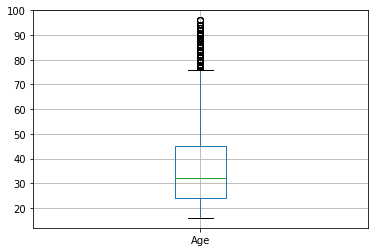

In [29]:
ax = df.boxplot()

The highest age found in the dataset is 96, which is not an unreasonable value. Below are the counts for each age 86 and above. We do not think these values are in error and see no reason to exclude them from the dataset.

In [30]:
df['Age'].max()

96

In [31]:
# create dataframe where age is greater than or equal to 86.
df1 = df[df['Age'] >= 86]

# Count values for each age
df1['Age'].value_counts()

86    40
87    34
90    27
88    23
89    18
91     9
94     6
93     5
92     5
96     4
Name: Age, dtype: int64

<a href='#Section_0'> Back to top </a>
<a id = 'Section_4_h'></a>

### h. Clean Dataset

The table below shows the first 5 observations in the clean dataset. 

In [32]:
df.head()

Area ID Reporting District  Age Sex Code Descent Code Charge Group Code  \
0      18               1802   23        F            B               nan   
1       8                842   41        M            H               3.0   
2       4                457   23        F            H               3.0   
3       6                663   27        M            O               5.0   
5      20               2049   41        M            W               4.0   

  Arrest Type Code              Location Hour arrest_year arrest_month  \
0                M  (33.9543, -118.2827)   17        2019            5   
1                F  (34.0508, -118.4592)   10        2019            4   
2                F  (34.0477, -118.2047)   18        2019           11   
3                F  (34.0907, -118.3384)    6        2019            4   
5                F  (34.0578, -118.2916)   15        2019            4   

  arrest_day_of_week  
0             Friday  
1             Monday  
2           Saturday  
3            Tuesday  
5            Tuesday

In [33]:
print("The clean data set has {:,} rows and {:,} columns".format(*df.shape))

The clean data set has 1,278,805 rows and 12 columns


<a href='#Section_0'> Back to top </a>
<a id = 'Section_5'></a>

## 5. Simple Statistics

Simple statistics for several categorical variables are found below. We did not include both description and code columns (when both are available) or location columns. From this table, we can see the following:
* There are 21 unique Areas, with Area ID 1 (Central) having the most arrests. 
* There are 1351 unique Reporting Districts and Reporting District 1412 has the most arrests. 
* Men have more arrests than women. 
* Hispanics have the highest number of arrests.
* The most common arrest type is a Misdemeanor.
* The most common Charge Group is 24 (Miscellaneous Other Violations).

In [34]:
# Assign, clean up, and split out the classes of data
ordinalFeatures = ['Age']
categoricalFeatures = ['Area ID', 'Reporting District', 'Sex Code', 'Descent Code',
                       'Charge Group Code', 'Arrest Type Code','Hour','arrest_year','arrest_month','arrest_day_of_week']

df[categoricalFeatures].describe()

Area ID Reporting District Sex Code Descent Code Charge Group Code  \
count   1278805            1278805  1278805      1278805           1278805   
unique       21               1351        2            4                29   
top           1               1412        M            H              24.0   
freq     130649              19180  1018010       586356            234480   

       Arrest Type Code     Hour arrest_year arrest_month arrest_day_of_week  
count           1278805  1278805     1278805      1278805            1278805  
unique                4       24          11           12                  7  
top                   M       16        2012            7           Thursday  
freq             783373    78268      155914       115218             212152

<a id = 'Section_5_a'></a>

### a. Arrest Type Code

The table below shows arrests grouped by `Arrest Type Code`. M-Misdemeanor is the most common arrest type, accounting for 61.3% of all arrests. This is followed by F-Felony, which accounts for 32.3% of all arrests. Arrest types of I-Infraction and O-Other only account for 6.4% of all arrests. Classification accuracy may prove challenging for Infractions and Other due to the low percentage of arrest incidents in the dataset.

In [35]:
count_percent(df,'Arrest Type Code')

Count Percent
Arrest Type Code                
F                 413081  32.30%
I                  55678   4.35%
M                 783373  61.26%
O                  26673   2.09%

<a href='#Section_0'> Back to top </a>
<a id = 'Section_5_b'></a>

### b. Gender

Arrests of men account for 79.6% of all arrests. Compare this with the population by gender for Los Angeles county: 50.73% female and 49.27% male (from [Think Health LA](https://www.thinkhealthla.org/demographicdata?id=256&sectionId=943#sectionPiece_281)). 49.27% of the population represents 79.6% of arrests.

In [36]:
count_percent(df,'Sex Code')

Count Percent
Sex Code                 
F          260795  20.39%
M         1018010  79.61%

<a id = 'Section_5_c'></a>

### c. Descent Code

Arrests where the offender was of Hispanic descent makes up 45.9% of arrests in this dataset. Even after combining the 16 lesser represented ethnicities, the "Other" category makes up around 6.0% of all arrests in the dataset. More details on demographic distribution of the population can be found in the [Exceptional Work](#Section_10) section. 

In [37]:
count_percent(df,'Descent Code')

Count Percent
Descent Code                
B             370156  28.95%
H             586356  45.85%
O              75909   5.94%
W             246384  19.27%

<a href='#Section_0'> Back to top </a>
<a id = 'Section_5_d'></a>

### d. Arrest Day of Week

Next, we look at the day of week the arrests occurred on. We expected to see an increase on weekends, but instead found Wednesday, Thursday and Friday to have a higher percentage of arrests. If there was no difference by day of week, we would expect to see 14.3% of arrests occurring each day of the week. Thursday has the highest percentage, at 16.6%, followed by Wednesday at 16.4% and Friday at 16.1%.

In [38]:
count_percent(df,'arrest_day_of_week')

Count Percent
arrest_day_of_week                
Friday              206218  16.13%
Monday              144278  11.28%
Saturday            183114  14.32%
Sunday              150047  11.73%
Thursday            212152  16.59%
Tuesday             173667  13.58%
Wednesday           209329  16.37%

<a href='#Section_0'> Back to top </a>
<a id = 'Section_5_e'></a>

### e. Hour

Below we look at the hours in a day to see if there are certain time frames with more arrests. We see what you might expect; the early morning hours have fewer arrests. Multiple factors may influence time distribution such as officer deployment schedules and civilian activity cycles. Without additional data, neither causality or correlation can be established. Most arrests were recorded during 4pm.

In [39]:
count_percent(df,'Hour')

Count Percent
Hour               
0     50612   3.96%
1     46467   3.63%
10    49726   3.89%
11    52741   4.12%
12    55937   4.37%
13    57936   4.53%
14    69383   5.43%
15    75660   5.92%
16    78268   6.12%
17    76208   5.96%
18    75360   5.89%
19    73500   5.75%
2     39509   3.09%
20    74837   5.85%
21    71247   5.57%
22    69286   5.42%
23    68223   5.33%
3     27365   2.14%
4     18169   1.42%
5     13711   1.07%
6     17971   1.41%
7     30319   2.37%
8     40814   3.19%
9     45556   3.56%

<a id = 'Section_5_f'></a>

### f. Arrest Month

We expected to see a rise in arrests during the Thanksgiving/Christmas Holiday season. We instead found that these were the months with the fewest arrests. Instead, summer months contained the largest number of arrests, which fits a known correlation between [higher temperature](https://drexel.edu/now/archive/2017/September/Violent-Crime-Increases-During-Warmer-Weather-No-Matter-the-Season/) and [crime rates](https://www.nature.com/articles/s41598-017-06720-z). After accounting for days in a month, there does not appear to be a large variance in arrests from month-to-month, with the exception of November and December.

In [40]:
count_percent(df,'arrest_month')

Count Percent
arrest_month                
1             110168   8.61%
10            104318   8.16%
11             93507   7.31%
12             90722   7.09%
2              99520   7.78%
3             112976   8.83%
4             107856   8.43%
5             114212   8.93%
6             107351   8.39%
7             115218   9.01%
8             115086   9.00%
9             107871   8.44%

<a href='#Section_0'> Back to top </a>
<a id = 'Section_5_g'></a>

### g. Arrest Year

Next, we look at arrests by `Year`. There has been a downward trend in arrests since 2012. The large decrease from 2018 to 2019 is probably due to a delay in transcribing the arrest records. We expect arrests in 2019 will continue to increase through the first part of 2020. Arrest counts for 2020 only include approxiamtely one week of data and cannot be used for comparison.

There are many factors that could cause the decrease in arrest rates seen from 2012-2019. Decreasing arrest rates may be indicative of lower police activity, changes in laws, and/or actual decreases in crime.

In [41]:
count_percent(df,'arrest_year')

Count Percent
arrest_year                
2010         151832  11.87%
2011         148652  11.62%
2012         155914  12.19%
2013         147304  11.52%
2014         135183  10.57%
2015         123003   9.62%
2016         115662   9.04%
2017         105361   8.24%
2018         102314   8.00%
2019          91715   7.17%
2020           1865   0.15%

<a href='#Section_0'> Back to top </a>
<a id = 'Section_5_h'></a>

### h. Age 

Finally, we look at statistics for `Age`. Many of the arrests recorded for ages below 16 are for arrest type Dependent. Charge descriptions for most of these cases indicate non-criminal detention due to parents/guardians being arrested or physical/sexual abuse/endagerment/abandonment cases. Other entries, like a 2-year-old arrested for petty theft, are more likely typographic errors. 

Of note is an entry for a 13-year-old arrested with a charge description of DUI (an age where one cannot drink or drive), but without access to additional data, we are unable to determine if this was a legitimate record. Arrests of minors ended up being less than 1% of the total dataset, so ages under 16 were filtered out.

Please note that that since arrest incidents for ages under 16 were already filtered out, the information provided here is supplied from the pre-filtered dataset.

In [42]:
df_age_13 = df_raw.loc[df_raw['Age'] == 13]
df_age_13.loc[df_age_13['Charge Group Description'] == 'Driving Under Influence']

Report ID Arrest Date    Time  Area ID   Area Name  \
837861    3600927  06/21/2013 2020.00       17  Devonshire   

        Reporting District  Age Sex Code Descent Code  Charge Group Code  \
837861                1791   13        M            H              22.00   

       Charge Group Description Arrest Type Code     Charge  \
837861  Driving Under Influence                M  21200.5VC   

                  Charge Description Address              Location  
837861  DUI ALCOHOL/DRUGS ON BICYCLE  ROSCOE  (34.2203, -118.5689)

`Age` has an interquartile range of 24-45, which represents the middle 50% of the data, after filtering on age. The highest age seen in the dataset is 96.

In [43]:
df['Age'].describe().apply(lambda x: '%.1f' % x)

count    1278805.0
mean          35.0
std           13.2
min           16.0
25%           24.0
50%           32.0
75%           45.0
max           96.0
Name: Age, dtype: object

Breaking `Age` down into 10 year bins, we see that the 16-24 age-range has the highest percentage of arrest incidents, at 29.1%. The percentage of arrest incidents decreases for each additional decade in age.

In [44]:
df_age = df
df_age['age_range'] = pd.cut(df_age.Age,[16,25,35,45,55,65,75,1e6],4,labels=['16-24','25-34','35-44','45-54','55-64','65-74','75+']) # this creates a new variable
count_percent(df_age,'age_range')

Count Percent
age_range                
16-24      365691  29.11%
25-34      344123  27.39%
35-44      235763  18.76%
45-54      204825  16.30%
55-64       89321   7.11%
65-74       14918   1.19%
75+          1780   0.14%

<a href='#Section_0'> Back to top </a>
<a id = 'Section_6'></a>

## 6. Visualize Attributes

In this section, we provide visualizations for individual attributes, without interactions with other variables.

<a id = 'Section_6_a'></a>

### a. Arrest Type Code

A simple bar plot for `Arrest Type Code` illustrates the percentage of arrests for each arrest type code. From the plot, we can see that Misdemeanors and Felonies account for the bulk of arrest types, at 61.3% and 32.3%, respectively. A bar plot is an appropriate visualization for `Arrest Type Code` because the attribute is categorical and bar plots compare values across subgroups of data.

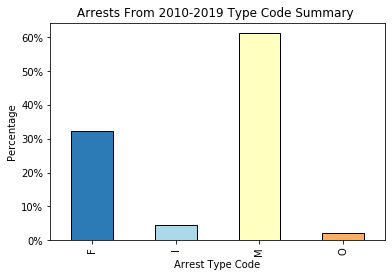

In [45]:
# arrest types as a percentage of total
from bokeh.palettes import all_palettes
import matplotlib.ticker as ticker

colors_list = all_palettes['RdYlBu'][5]

at3 = df.groupby('Arrest Type Code')['Arrest Type Code'].count()
t = at3.sum()
at3p = (at3/t)
p = [at3p[0], at3p[1], at3p[2], at3p[3]]

d1 = {'Arrest Count': at3, 'Percent':p}
at4 = pd.DataFrame(data = d1)

pplot = at4['Percent'].plot(kind = 'bar', color = colors_list, edgecolor = 'black')
plt.title("Arrests From 2010-2019 Type Code Summary ")
pplot.set_ylabel("Percentage")
pplot.yaxis.set_major_formatter(ticker.PercentFormatter(xmax = 1))

<a href='#Section_0'> Back to top </a>
<a id = 'Section_6_b'></a>

### b. Descent Code

The bar plot below illustrates arrests by `Descent Code` where the H-Hispanic, B-Black, W-White, and O-Other. We can see that the Hispanic and Black descent codes account for a majority of arrests, at 45.9% and 29.0%, respectively. A bar plot is an appropriate visualization for `Descent Code` because the attribute is categorical and bar plots compare values across subgroups of data.

Text(0.5, 0, 'Arrest Counts')

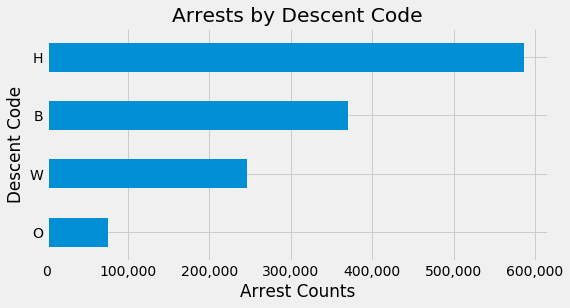

In [46]:
# set plot style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 4))


# Descent code plot
arrests_by_code = df["Descent Code"].value_counts()
arrests_by_code.sort_values().plot(kind='barh').get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Arrests by Descent Code')
plt.ylabel('Descent Code')
plt.xlabel('Arrest Counts')

<a href='#Section_0'> Back to top </a>
<a id = 'Section_6_c'></a>

### c. Hour

The line plot of arrests by hour of the day illustrates the arrest counts by the hour of arrest. We see a major dip in the line plot. This dip at 5am can potentially be attributed to a shift change. The early morning hours in general show fewer arrests than other times of the time, which could also be attributed to typically sleeping patterns. 4pm is the hour with the highest number of arrests. While we have chosen to use `Hour` as a categorical value, there is still a linear relationship between hours that is useful for graphing purposes. A line plot is an appropriate visualization for `Hour` because it sequentially shows the number of arrests by hour, allowing us to see patterns throughout the day.

Text(0.5, 0, 'Hour of the Day')

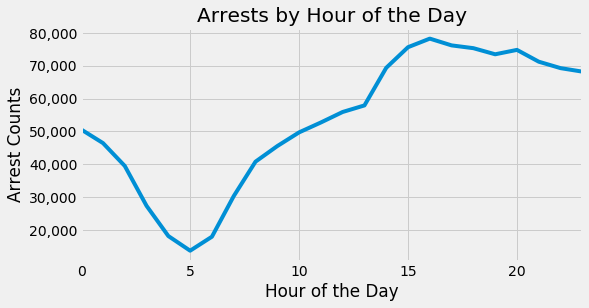

In [47]:
# set plot style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 4))

df_hour = df
df_hour['Hour'] = df_hour['Hour'].astype(int)
df.groupby('Hour')['Hour'].count().plot(kind = 'line').get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title('Arrests by Hour of the Day')
plt.ylabel('Arrest Counts')
plt.xlabel('Hour of the Day')

<a href='#Section_0'> Back to top </a>
<a id = 'Section_6_d'></a>

### d. Age

The graph below provides a histogram for the distribution of ages. There is a sharp rise in the number of arrests for teenagers through the mid-20s. Arrests steadily fall from the mid-twenties, plateau in the 40s and 50s and then decline again. A histogram is an appropriate visualization for `Age` because `Age` is numeric and a histogram shows the distribution of arrests by age. A boxplot is another good visualization tool (from [Section 4 G](#Section_4_g) above).

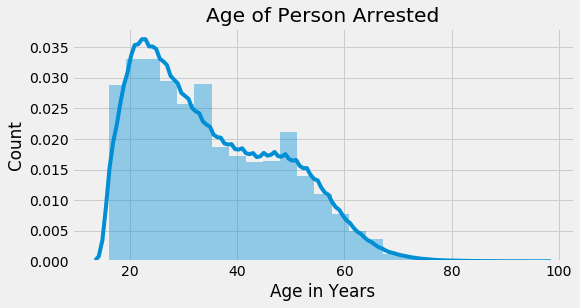

In [48]:
# set plot style
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8, 4))

# distribution of age in years
sns.distplot(df['Age'], bins = 25);
plt.title('Age of Person Arrested'); plt.xlabel('Age in Years'); plt.ylabel('Count');

<a href='#Section_0'> Back to top </a>
<a id = 'Section_6_e'></a>

### e. Reporting District

We expected there to be areas of Los Angeles with a higher number of arrest incidents. The map below uses a color-scale to highlight Reporting Districts with higher arrest counts. The cluster of lighter Reporting Districts represents Hollywood in the map below. We used this type of visualization to get a better sense of where the highest number of arrests are occurring, in the context of a map.

Text(0.5, 1, 'Arrests by Reporting District')

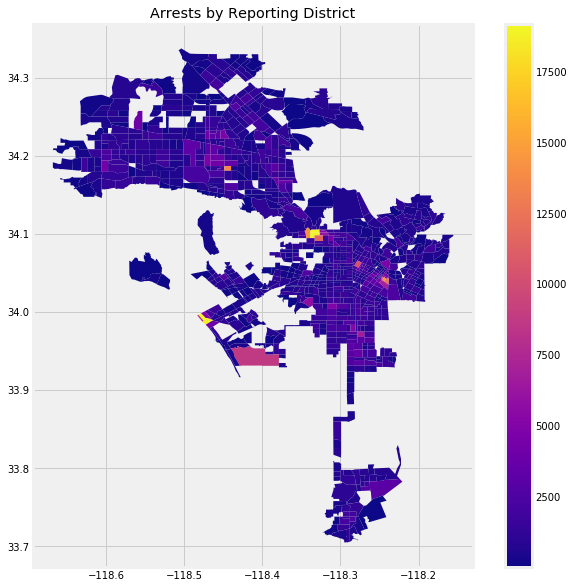

In [49]:
#http://geopandas.org/gallery/plotting_with_geoplot.html
gdf = gpd.read_file('../Data/LAPD_Reporting_Districts.shp')

#create counts to merge with polygon dataframe 

district_counts = df['Reporting District'].value_counts().reset_index().rename(columns={'index': 'Key'})
district_counts.columns = ['Key', 'District Counts']

male = df[df['Sex Code'] == 'M']
male_counts = male['Reporting District'].value_counts().reset_index().rename(columns={'index': 'key'})
male_counts.columns = ['Key','Male_Counts']

female = df[df['Sex Code'] == 'F']
female_counts = female['Reporting District'].value_counts().reset_index().rename(columns={'index': 'key'})
female_counts.columns = ['Key','Female_Counts']

arrestf = df[df['Arrest Type Code'] == 'F']
arrestf_counts = arrestf['Reporting District'].value_counts().reset_index().rename(columns={'index': 'key'})
arrestf_counts.columns = ['Key','Felony_Counts']

arrestm = df[df['Arrest Type Code'] == 'M']
arrestm_counts = arrestm['Reporting District'].value_counts().reset_index().rename(columns={'index': 'key'})
arrestm_counts.columns = ['Key','Misdemeanor_Counts']

arresti = df[df['Arrest Type Code'] == 'I']
arresti_counts = arresti['Reporting District'].value_counts().reset_index().rename(columns={'index': 'key'})
arresti_counts.columns = ['Key','Infraction_Counts']

arresto = df[df['Arrest Type Code'] == 'F']
arresto_counts = arresto['Reporting District'].value_counts().reset_index().rename(columns={'index': 'key'})
arresto_counts.columns = ['Key','Other_Counts']

year_counts = df.groupby(['Reporting District','arrest_year']).size().reset_index()
year_counts.columns = ['Key','Year','Year_Dist_Counts']
year_counts['Key']=year_counts['Key'].astype(int)

merged1 = district_counts.merge(male_counts, left_on='Key', right_on='Key')
merged2 = merged1.merge(female_counts,left_on='Key', right_on='Key')
merged3 = merged2.merge(arrestf_counts,left_on='Key', right_on='Key')
merged4 = merged3.merge(arrestm_counts,left_on='Key', right_on='Key')
merged5 = merged4.merge(arresti_counts,left_on='Key', right_on='Key')
merged6 = merged5.merge(arresto_counts,left_on='Key', right_on='Key')
merged6['Key']=merged2['Key'].astype(int)

#merge polygon dataframe with counts by reporting district
gdf1 = gdf.merge(merged6, left_on='REPDIST', right_on='Key')
gdf2 = gdf1.merge(year_counts, left_on='REPDIST',right_on='Key')

%matplotlib inline
gdf1.plot(column='District Counts', cmap='plasma', figsize=(10, 10),  legend=True)
plt.title('Arrests by Reporting District')

<a href='#Section_0'> Back to top </a>
<a id = 'Section_7'></a>

## 7. Explore Joint Attributes

<a id = 'Section_7_a'></a>

### a. Age and Gender

A KDE plot shows the distribution of a variable as a sort of "smoothed" histogram. Here, we have compared the density plots of males and females for the age variable.

While similar distributions are seen for males and females, a greater proportion of female arrests occur at young ages than males.  This may be due to greater prostitution at those ages in females.

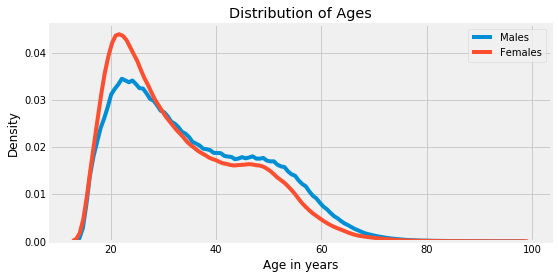

In [54]:
plt.figure(figsize = (8, 4))

# KDE Plot of males
sns.kdeplot(df.loc[df['Sex Code'] == 'M', 'Age'], label = 'Males')

# KDE plot of females                   
sns.kdeplot(df.loc[df['Sex Code'] == 'F', 'Age'], label = 'Females')

# Labels
plt.xlabel('Age in years'); plt.ylabel('Density'); plt.title('Distribution of Ages');

<a href='#Section_0'> Back to top </a>
<a id = 'Section_7_b'></a>

### b. Age and Descent Code

The KDE plot for age by descent code shows the greatest densities for all descent codes somewhere between 20 and 25 years. There are additional density peaks near age 50 for the White and Black descent codes. The Hispanic descent code shows a sharper peak in the early 20s than the other descent codes, and subsequently lower density at higher ages.

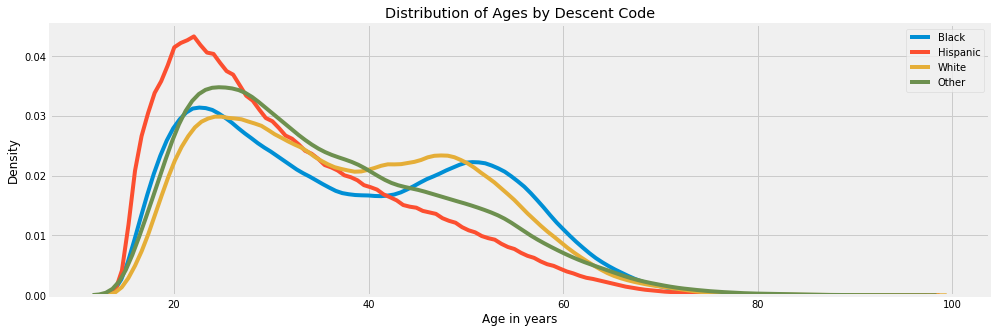

In [55]:
plt.figure(figsize = (15, 5))

# KDE Plots Age by Descent Code
sns.kdeplot(df.loc[df['Descent Code'] == 'B', 'Age'], label = 'Black')
sns.kdeplot(df.loc[df['Descent Code'] == 'H', 'Age'], label = 'Hispanic')
sns.kdeplot(df.loc[df['Descent Code'] == 'W', 'Age'], label = 'White')
sns.kdeplot(df.loc[df['Descent Code'] == 'I', 'Age'], label = 'American Indian/Alaskan Native')
sns.kdeplot(df.loc[df['Descent Code'] == 'O', 'Age'], label = 'Other')

# Labels
plt.xlabel('Age in years'); plt.ylabel('Density'); plt.title('Distribution of Ages by Descent Code');

<a id = 'Section_7_c'></a>

### c. Age and Arrest Year


When we plot the kernel density estimates of `Age` and `Arrest Year` we can see a slight shift in age density as the years' progress. In 2010, the greatest density was around 19 years, and by 2018 and 2019 the greatest density is around 25 years. This is an interesting observation. One possible explanation could be an increase in programs for high school students, where the intention is to increase the awareness of crime.

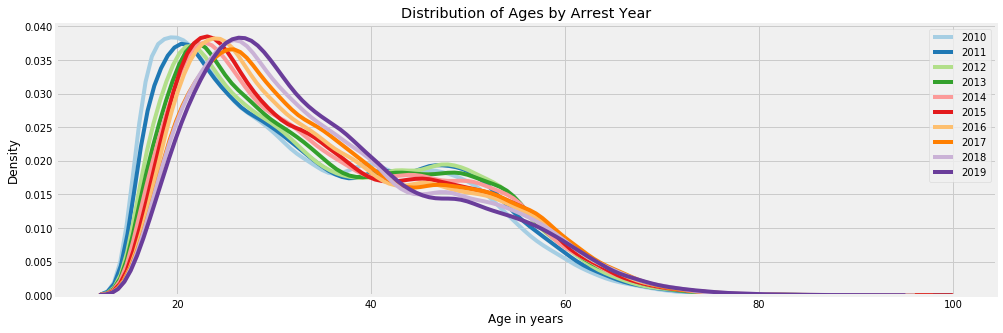

In [56]:
plt.figure(figsize = (15, 5))

sns.set_palette("Paired", 10)

# KDE Plots Age by Arrest Year
sns.kdeplot(df.loc[df['arrest_year'] == '2010', 'Age'], label = '2010')
sns.kdeplot(df.loc[df['arrest_year'] == '2011', 'Age'], label = '2011')
sns.kdeplot(df.loc[df['arrest_year'] == '2012', 'Age'], label = '2012')
sns.kdeplot(df.loc[df['arrest_year'] == '2013', 'Age'], label = '2013')
sns.kdeplot(df.loc[df['arrest_year'] == '2014', 'Age'], label = '2014')
sns.kdeplot(df.loc[df['arrest_year'] == '2015', 'Age'], label = '2015')
sns.kdeplot(df.loc[df['arrest_year'] == '2016', 'Age'], label = '2016')
sns.kdeplot(df.loc[df['arrest_year'] == '2017', 'Age'], label = '2017')
sns.kdeplot(df.loc[df['arrest_year'] == '2018', 'Age'], label = '2018')
sns.kdeplot(df.loc[df['arrest_year'] == '2019', 'Age'], label = '2019')

# Labels
plt.xlabel('Age in years'); plt.ylabel('Density'); plt.title('Distribution of Ages by Arrest Year');

<a href='#Section_0'> Back to top </a>
<a id = 'Section_7_d'></a>

### d. Descent Code and Gender

The stacked bar plot below show us again that the Black and Hispanic arrest codes account for a majority of arrests. It is interesting to note, however, that though Hispanic females tend to account for more arrests than females of any other descent code, Hispanic females account for a lower proportion of arrests for their descent code than females from the other three descent codes. This is a good example of how bar plots with counts and bar plots with percentages can give different perspectives.

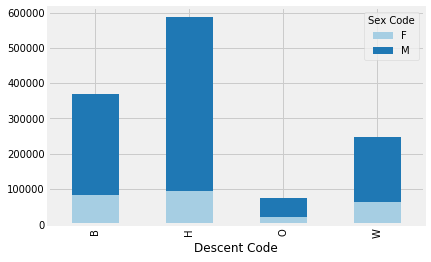

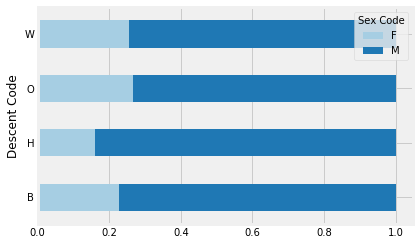

In [57]:
# cross tabulate example from http://nbviewer.ipython.org/gist/fonnesbeck/5850463# 
%matplotlib inline
counts = pd.crosstab(df['Descent Code'], df['Sex Code'])
counts.plot(kind='bar', stacked=True)

# divide the counts to get rates
rate = counts.div(counts.sum(1).astype(float),axis=0)
rate.plot(kind='barh', stacked=True)

<a href='#Section_0'> Back to top </a>
<a id = 'Section_7_e'></a>

### e. Gender and Arrest Day of Week

When we look as the cross tabulation of `Sex Code` and `arrest_day_of_week`, we notice that there is no particular difference between the arrest day and gender. Most arrests happen on Thursdays and the fewest arrest happen on Mondays for both males and females.  

In [58]:
# define colors
coral = '#f88c8c'
lightgreen = '#99ee98'

pd.crosstab(index=df['arrest_day_of_week'], columns=df['Sex Code']).style.format("{:,.0f}").highlight_max(color=lightgreen).highlight_min(color=coral)

<a id = 'Section_7_f'></a>

### f. Age, Gender, and Day of Week

The cross tabulation above let us know the days on which the most arrests occur. A violin plot can be thought of as a mirrored density plot. Below, the violin plot shows us that there is no difference in the days on which a certain age group by gender is generally arrested. 

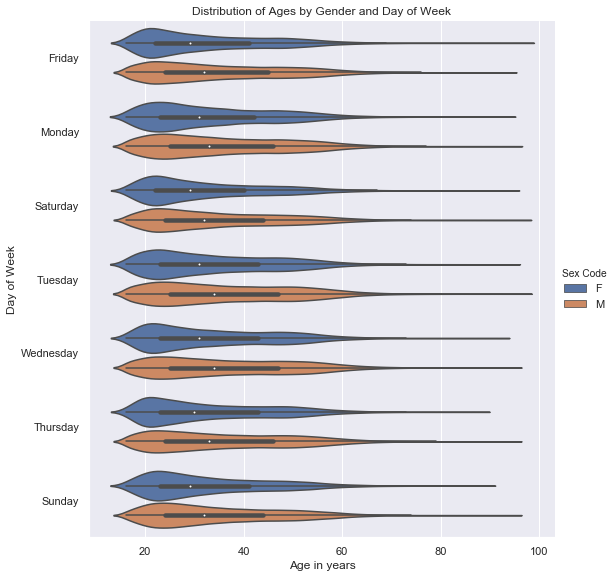

In [59]:
sns.set(rc={'figure.figsize':(20,35)})

# Violin Plot
sns.catplot(x = "Age",
           y = "arrest_day_of_week",
           hue = "Sex Code",
           kind = "violin",
           data = df,
           height = 8);

# Labels
plt.xlabel('Age in years'); plt.ylabel('Day of Week'); plt.title('Distribution of Ages by Gender and Day of Week');

<a href='#Section_0'> Back to top </a>
<a id = 'Section_7_g'></a>

### g. Reporting District and Gender

The maps below look at arrests by gender and Reporting District. The scales have been adjusted to be able to compare the 2 plots side-by-side. We see the expected spike for males in the Hollywood area. Due to the previously mentioned observation that males account for more arrests that females, it is not unexpected to note that females do not show the same spike in Hollywood. There is a lightening in color for females in Hollywood but not to the extent seen for males.

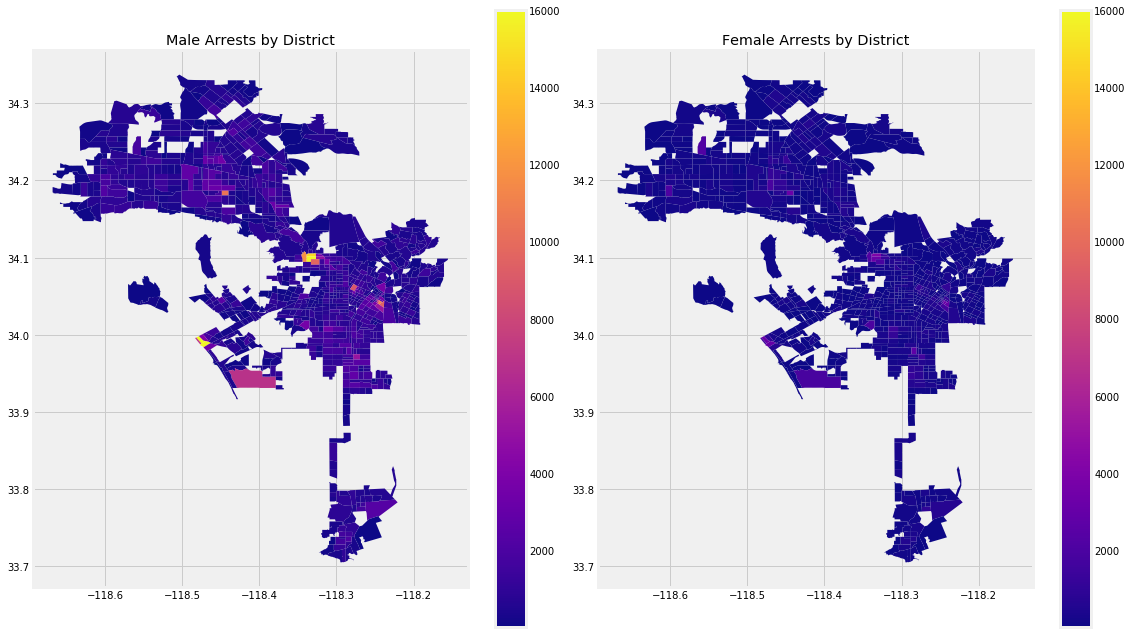

In [50]:
%matplotlib inline
fig = plt.figure(figsize=(16,18))
ax = plt.subplot(2,2,1)
gdf1.plot(column='Male_Counts', ax=ax, cmap='plasma', legend=True, vmax = 16000)
ax.set_title('Male Arrests by District')
ax.set_aspect('equal')

ax = plt.subplot(2,2,2)
gdf1.plot(column='Female_Counts', ax=ax, cmap='plasma', legend=True, vmax = 16000)
ax.set_title('Female Arrests by District')
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

<a href='#Section_0'> Back to top </a>
<a id = 'Section_7_h'></a>

### h. Reporting District and Year

The plot below shows arrest counts by Reporting District by year. This is intended to be launched as a locally hosted application. As such, the slider does not work in current viewing format. However, the mouse-over capability does work in the current viewing format.

The slider shows the areas of Venice Beach (Reporting Districts 1411, 1412, and 1431), Downtown L.A. (Reporting Districts 156, 157, 158, 1307), Hollywood (Reporting Districts 637, 645, 646, and 666), and the Los Angeles International Airport (Reporting District 1494) account for the most arrests every year. 

The coloring (related to the number of arrests) shows that the arrest counts do indeed decrease each year in the highest arrest incident areas.

In [51]:
#https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0
#https://github.com/CrazyDaffodils/Interactive-Choropleth-Map-Using-Python

#convert Year to int
gdf2['Year'] = gdf2['Year'].astype(str).astype(int)

#Read data to json
merged_json = json.loads(gdf2.to_json())

#Convert to str like object
json_data = json.dumps(merged_json)

In [52]:
#Define function that returns json_data for year selected by user.
    
def json_data(selectedYear):
    yr = selectedYear
    df_yr = gdf2[gdf2['Year'] == yr]
    #merged = gdf.merge(df_yr, left_on = 'country_code', right_on = 'code', how = 'left')
    #merged.fillna('No data', inplace = True)
    merged_json = json.loads(df_yr.to_json())
    json_data = json.dumps(merged_json)
    return json_data

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data(2010))

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][9]

#Reverse color order so that dark blue is highest obesity.
#palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 2500)

#Define custom tick labels for color bar.
#tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Add hover tool
hover = HoverTool(tooltips = [ ('Reporting District','@REPDIST'),('Arrests', '@Year_Dist_Counts')])


#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')


#Create figure object.
p = figure(title = 'Los Angeles Arrests by Reporting District', plot_height = 850 , plot_width = 600, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'Year_Dist_Counts', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)


p.add_layout(color_bar, 'below')

# Define the callback function: update_plot
def update_plot(attr, old, new):
    yr = slider.value
    new_data = json_data(yr)
    geosource.geojson = new_data
    p.title.text = 'Arrest Counts' %yr
    
# Make a slider object: slider 
slider = Slider(title = 'Year',start = 2010, end = 2019, step = 1, value = 2010)
slider.on_change('value', update_plot)

# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p,widgetbox(slider))
curdoc().add_root(layout)

#Display plot inline in Jupyter notebook
output_notebook()

#Display plot
show(layout)

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



The heatmap below shows the 30 reporting districts with the most arrests for period 1 January 2010 through 12 January 2020. We can see that there is what can be considered "hot zones" over the past 10 years. These "hot zones" are the areas of Downtown L.A., Hollywood, and Venice Beach. 

As in the visualization above, these zones are in reporting districts 156, 157, 158 which are the DTLA areas bounded by Wall Street, Alameda Street, 4th Street and 7th Street; districts 636, 645, 646, 665, and 666 which are the areas in Hollywood between Santa Monica Blvd and Hollywood Blvd; and districts 1411, 1412, and 1431, which is the area of Venice Beach between the Pacific ocean, North Venice Blvd and Abbot Kinney Blvd.  

In [60]:
# create cross tabulation object
hot_zones = pd.crosstab(index=df['Reporting District'], 
            columns=df['arrest_year'], 
            margins = True, 
            margins_name = "Total").sort_values(by = 'Total', ascending = False)

# Sort by Total arrests and select the top 30. Exclude index 0, which is the totals of each column.
df_hot_zones = hot_zones[1:30].sort_values(by = 'Reporting District', ascending = True)

# Drop Total column
df_hot_zones.drop(['Total'],axis=1,inplace=True)

Text(0.5, 1, 'Annual Count of Arrests by Reporting District')

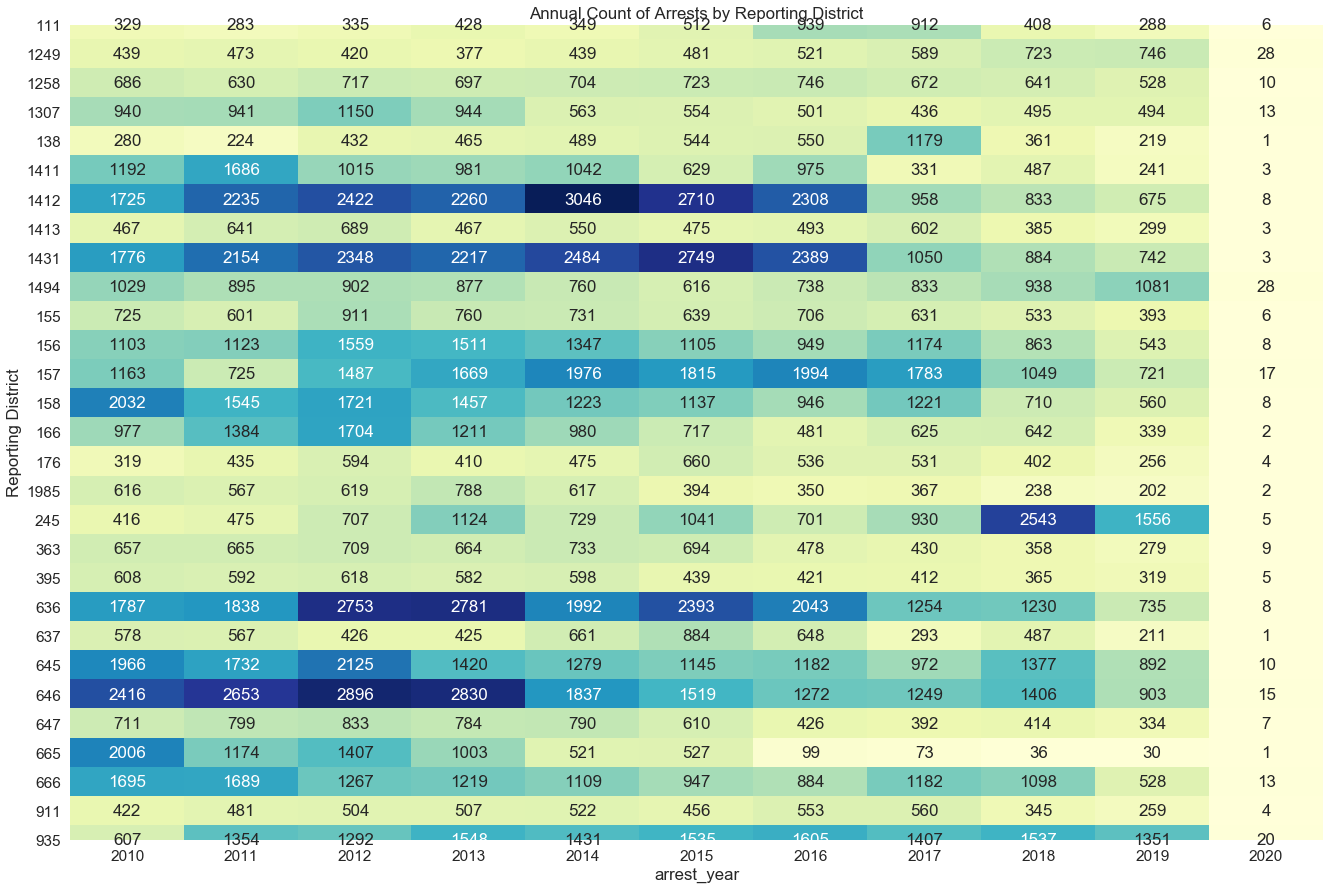

In [61]:
# set size and font scale
sns.set(rc={'figure.figsize':(20,15)}, font_scale=1.4)

# plot heatmap
sns.heatmap(df_hot_zones, cmap="YlGnBu", annot=True, cbar=False, fmt='g', annot_kws={"size":17})
plt.yticks(rotation=0) 
plt.title('Annual Count of Arrests by Reporting District')

<a href='#Section_0'> Back to top </a>
<a id = 'Section_8'></a>

## 8. Explore Attributes and Class

We examined relationships between arrest type and gender, location, descent, age, and day of week.  We discovered that some of these relationships, such as location and age, did not offer a lot of differentiation and would therefore be of limited use in prediction.  Other factors, however, such as day of week, race, and gender in conjunction with those, do provide enough variety to be useful in classification.

<a id = 'Section_8_a'></a>

### a. Arrest Type and Reporting District
Most districts have a fairly even level of arrests.  The exceptions are that non-infraction arrests tend to spike near the center of the city and are greater in the south east district.  Misdemeanors increase to the north central, south west, and south east areas.  Thus, area may not be helpful in many instances to aid dispatching; however, for the areas where there is more variability as noted above, the reporting district would be useful in predicting the most likely arrrest types at time of dispatch and thus the appropriate level of police response.

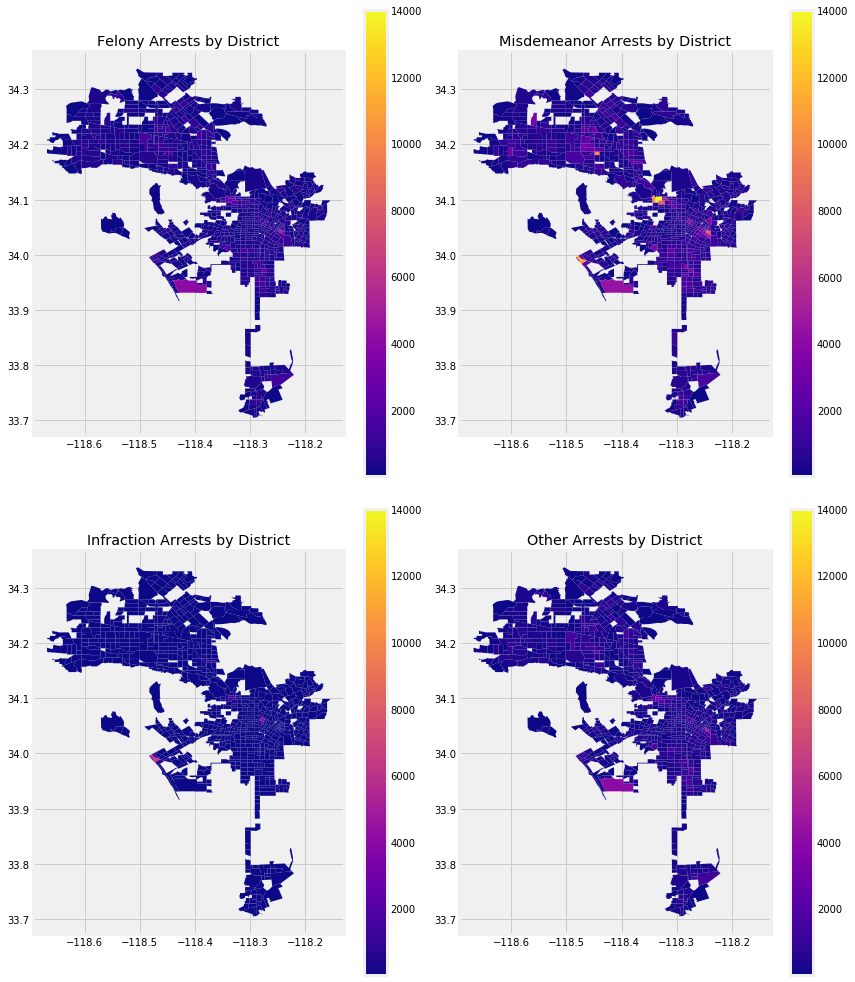

In [53]:
%matplotlib inline
fig = plt.figure(figsize=(12,14))
ax = plt.subplot(2,2,1)
gdf1.plot(column='Felony_Counts', ax=ax, cmap='plasma', legend=True, vmax = 14000)
ax.set_title('Felony Arrests by District')
ax.set_aspect('equal')

ax = plt.subplot(2,2,2)
gdf1.plot(column='Misdemeanor_Counts', ax=ax, cmap='plasma', legend=True, vmax = 14000)
ax.set_title('Misdemeanor Arrests by District')
ax.set_aspect('equal')

ax = plt.subplot(2,2,3)
gdf1.plot(column='Infraction_Counts', ax=ax, cmap='plasma', legend=True, vmax = 14000)
ax.set_title('Infraction Arrests by District')
ax.set_aspect('equal')

ax = plt.subplot(2,2,4)
gdf1.plot(column='Other_Counts', ax=ax, cmap='plasma', legend=True, vmax = 14000)
ax.set_title('Other Arrests by District')
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

<a href='#Section_0'> Back to top </a>
<a id = 'Section_8_b'></a>

### b. Arrest Types over Time

Misdemeanors and felonies are by far the most numerous types of arrests.  Misdemeanors are the most numerous, which is what you might expect given that misdemeanors are for less serious offenses.  Interestingly, misdemeanors in 2010 are more than double the number of felonies.  While both types of arrests go down over time - a testament, perhaps, to improvements in law enforcement or prevention programs - it is interesting to note that misdemeanors drop most dramatically, almost to the same level as felonies by 2019.  Put another way, misdemeanors dropped by more than half from 2010 to 2019, whereas felonies remained mostly the same with a notable (though much smaller) drop between 2014 and 2015.

In fact, most types of arrests trend downward each year except for infractions, which start to rise around 2013. Misdemeanors decrease consistently, while felonies level off around 2015. Additional research could be done into the socio-political changes surrounding law enforcement over time to determine the effectiveness of various ordnances/propositions/laws.  It would also be interesting to study whether the dramatic decrease in misdemeanors is due to better policy or to reduced policing effectiveness.  In other words, did policies reduce the incidence of misdemeanors, or were police simply not catching as many offenders?

Note that for this visualization we use the pre-filtered dataset, where Dependent arrest types are present in the data.

In [62]:
#exploring arrest type over time

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange, IndexFilter, CDSView, Circle, HoverTool, BoxSelectTool, Square, GroupFilter
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.palettes import Paired, Viridis256
from bokeh.models.widgets import Toggle

output_notebook()

# Convert Arrest Date to datetime
df2['Arrest Date'] = pd.to_datetime(df2['Arrest Date'])
df2['arrest_year']= df2['Arrest Date'].dt.year

#get count of types of arrests per year as int form
#filter of number of unique arrest types for each type by year
crime_d = df2.loc[df2['Arrest Type Code'] == 'D']
d_by_year = pd.DataFrame(list(crime_d.groupby('arrest_year')['Report ID'].nunique()), index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
crime_i = df2.loc[df2['Arrest Type Code'] == 'I']
i_by_year = pd.DataFrame(list(crime_i.groupby('arrest_year')['Report ID'].nunique()), index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
crime_m = df2.loc[df2['Arrest Type Code'] == 'M']
m_by_year = pd.DataFrame(list(crime_m.groupby('arrest_year')['Report ID'].nunique()), index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
crime_f = df2.loc[df2['Arrest Type Code'] == 'F']
f_by_year = pd.DataFrame(list(crime_f.groupby('arrest_year')['Report ID'].nunique()), index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
crime_o = df2.loc[df2['Arrest Type Code'] == 'O']
o_by_year = pd.DataFrame(list(crime_o.groupby('arrest_year')['Report ID'].nunique()), index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
atypes = ['Dependent', 'Infraction', 'Misdemeanor', 'Felony', 'Other']
#note, goal is years as the bottommost x axis, split by count of arrest type per year
data2 = {'years' : years,
       'Dependent'  : list(map(int, d_by_year.head(10)[0])),
       'Infraction'  : list(map(int, i_by_year.head(10)[0])),
       'Misdemeanor'  : list(map(int, m_by_year.head(10)[0])),
       'Felony'  : list(map(int, f_by_year.head(10)[0])),
       'Other'  : list(map(int, o_by_year.head(10)[0]))}

x2 = [ (year, atype) for year in years for atype in atypes]
counts2 = sum(zip(data2['Dependent'], data2['Infraction'], data2['Misdemeanor'], data2['Felony'], data2['Other']), ())

source2 = ColumnDataSource(data=dict(x2=x2, counts2 = counts2))
#hmm does data=dict passes x and y? or columns

#how to separate out the x2 into different fields
TOOLTIPS = [
    ("Year,Arrest Type", "@x2"),
    ("Count", "@counts2"),
]


p = figure(x_range=FactorRange(*x2), plot_height=600, plot_width = 900, title="Arrest Type by Year",
           toolbar_location='left',  tooltips = TOOLTIPS, tools=("save", "hover", "crosshair", 'xwheel_pan'))
#size is also misbehaving, it fit better in my own notebook, not sure why it doesn't here

p.toolbar.active_scroll = "auto"

#ok so this works for having all the bars share one color gradient, how to categorical grade?
p.vbar(x='x2', top='counts2', width=.75, source=source2, line_color = "white",
#fill_color = 'grey')
fill_color =Viridis256[1])
#fill_color = factor_cmap('x2', palette=Viridis256, factors = x2)) #worked in my notebook, troubleshoot later
#looks like to instantiate each arrest type separately, need seperate vbar for each? 

#list of values for each category matching arrest type (can't seem to filter... list? whatever x2 is)
#end up selecting interval lists from each x and y list(?) thing in order to link each bar
#there's probably a better way to automate this...
d_list = list(x2[i] for i in list(range(0, 50, 5)))
d_count = list(counts2[i] for i in list(range(0, 50, 5)))

i_list = list(x2[i] for i in list(range(1, 51, 5)))
i_count = list(counts2[i] for i in list(range(1, 51, 5)))

m_list = list(x2[i] for i in list(range(2, 52, 5)))
m_count = list(counts2[i] for i in list(range(2, 52, 5)))

f_list = list(x2[i] for i in list(range(3, 53, 5)))
f_count = list(counts2[i] for i in list(range(3, 53, 5)))

o_list = list(x2[i] for i in list(range(4, 54, 5)))
o_count = list(counts2[i] for i in list(range(4, 54, 5)))

#generates set of colors 5 long to assign to lines
col = brewer['Paired'][5]

p.line(d_list, d_count, line_width = 2, line_color = col[0])
p.line(i_list, i_count, line_width = 2, line_color = col[1])
p.line(m_list, m_count, line_width = 2, line_color = col[2])
p.line(f_list, f_count, line_width = 2, line_color = col[3])
p.line(o_list, o_count, line_width = 2, line_color = col[4])

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)

#change color on hover? 
#or switch state on hover, panel between the lines and bar depending on mouseover to avoid crowding
#break up bars by gender/ethnicity? 

Loading BokehJS ...

<a href='#Section_0'> Back to top </a>
<a id = 'Section_8_c'></a>

### c. Arrest Type, Age and Gender

The arrest patterns between the genders is remarkably similar across all arrest types.  For all types and genders, arrests peak in the 20s and fall off at varying rates after that.  Women in their early 20s, in fact, have the highest incidence of misdemeanors vs. men.  This might be due to a concentration of prostitution in that age.  Starting in the mid-20s, both sexes even out for misdemeanors.

For felonies, men and women have an almost identical distribution, which is surprising.  We would have expected males to have far greater felony arrest rates than females.  It may be that different types of felonies are causing the aggregate to appear as it does.  If we drill down into the types of felonies, we may find that crimes such as murder, robbery, or rape are greater in males, whereas more domestic crimes like child abuse, interfering with custody rights, or assisting in a felony (that is perhaps perpetrated by a male acquaintance) are greater with females.

Infractions occur in an almost identical pattern to misdemeanors, with females peaking in their early 20s and both sexes stabilizing until their 50s.  The miscellaneous category of Other types are slightly greater in males, but females start earlier in life.  Both have a similar distribution thereafter.

As a result, other than the slight variations at certain ages noted above, gender would seem to have little predictive value in determining the arrest type.  A finer granularity that breaks down misdemeanors and felonies might prove to be more useful.

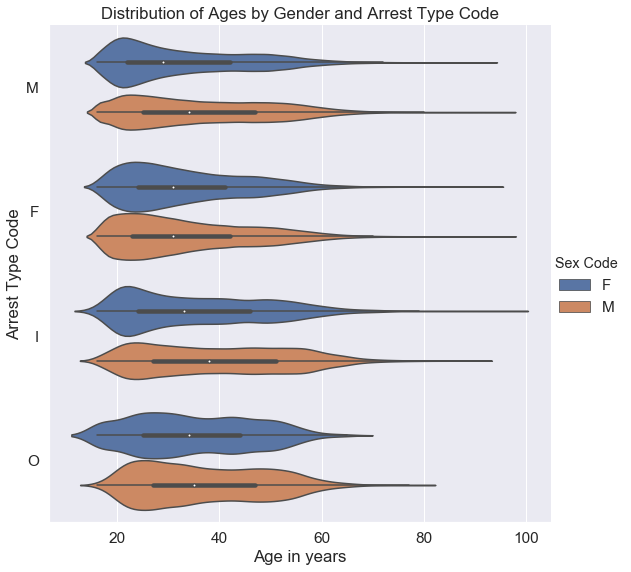

In [63]:
# Violin plot
sns.catplot(x = "Age",
           y = "Arrest Type Code",
           hue = "Sex Code",
           kind = "violin",
           data = df,
           height = 8);

# Labels
plt.xlabel('Age in years'); plt.ylabel('Arrest Type Code'); plt.title('Distribution of Ages by Gender and Arrest Type Code');

<a href='#Section_0'> Back to top </a>
<a id = 'Section_8_d'></a>

### d. Arrest Type, Day of Week, and Gender

In this part of the analysis, we examine the connection between these 3 factors. In terms of raw numbers, men greatly outnumber women in their rates of arrest for misdemeanors, which is what you might expect. In fact, the greatest number of total arrests occur with men being arrested for misdemeanors on Fridays, perhaps due to bar fights, drunkenness, or domestic abuse - this is what you also might expect given our common perception of men's behavior. Interestingly, women peak on Thursday, though. The reason is pure speculation, though it would be curious to dig into this behavior. Perhaps they are frustrated from a long week? Is there anxiety about the upcoming weekend that perhaps spikes some misbehavior? It is certainly an area that could be studied more.

The lowest rates of misdemeanors occur on Monday for both sexes. Despite the popular dislike of Mondays, it would seem that few people are interested in taking out their Monday frustrations with misbehavior. In fact, the lowest rates across all crimes and sexes are on Monday and Sunday, which is exactly opposite the highest days of Wednesday and Thursday in the weekly cycle. This would seem to reinforce the idea that criminal activity generally follows a weekly cyclical pattern.

Felonies seem to spike for everyone on Wednesday, which we found surprising, as we would have expected Friday or Saturday to be the greatest in this category. It would be interesting to learn more as to why. Maybe the exact types of felony would be helpful here. For instance, if relatively less violent crime, such as burglaries, happen in greater numbers during the week while people are at work, that might explain the data we see.

In [64]:
# cross tab of arrests by Gender, Arrest Type Code, and Day of Week
pd.crosstab(index=df['arrest_day_of_week'], 
            columns=[df['Sex Code'], 
                     df['Arrest Type Code']], 
            colnames=['Sex Code','Arrest Type Code']).style.format("{:,.0f}").highlight_max(color = lightgreen).highlight_min(color = coral)

<a href='#Section_0'> Back to top </a>
<a id = 'Section_8_e'></a>

### e. Arrest Type and Gender
As we've seen in other relationships above, men commit more crimes than women, and misdemeanors are committed at a higher rate than felonies (with other types being of far lower incidence).  This makes sense given that men tend to be more daring and possibly violent than women due to their biological differences (additional testosterone, for instance).  It also makes sense from the standpoint that less serious offences like misdemeanors would happen with greater frequency than more serious felonies.  We would expect a predictive model using this data to report misdemeanors among men with the greatest frequency, followed by male felonies, then female misdemeanors, then female felonies, then all others.

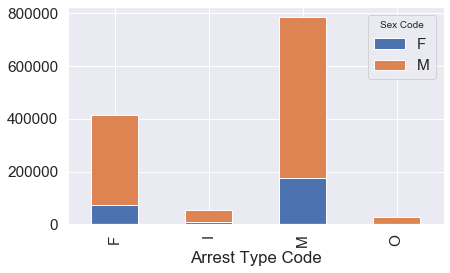

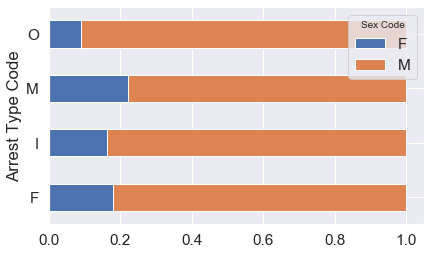

In [65]:
# cross tabulate example from http://nbviewer.ipython.org/gist/fonnesbeck/5850463# 
%matplotlib inline
counts = pd.crosstab([df['Arrest Type Code']], df['Sex Code'])
counts.plot(kind='bar', stacked=True)

# divide the counts to get rates
rate = counts.div(counts.sum(1).astype(float),axis=0)
rate.plot(kind='barh', stacked=True)

<a href='#Section_0'> Back to top </a>
<a id = 'Section_8_f'></a>

### f. Arrest Type, Gender, and Descent Code

Looking at descent code is not any sort of racial profiling, though any use of this category in prediction should be approached with caution given the potential political controversy that it could cause, especially amongst normal (i.e. non-data science) people.

That being said, it could be a useful dimension to look at when predicting arrest types. Based on the plots below, Hispanic people have by far the highest incidence of misdemeanor arrest, nearly double the next-highest category of Black. Amongst felonies, Black and Hispanic populations are arrested at a similar rate to each other and to Caucasian misdemeanors.

Since there is a noticeable variation in arrest rates between these categories, this would be a useful category to predict likely offences at the time of dispatch.

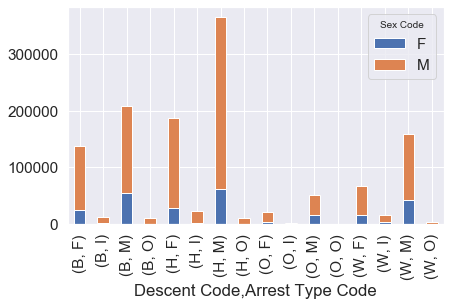

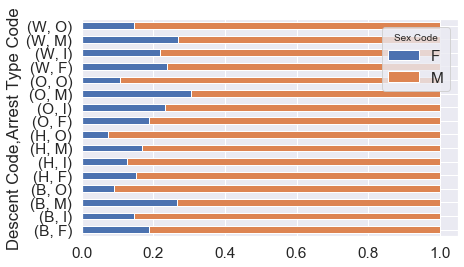

In [66]:
%matplotlib inline
descent = ['B','H','O','W']
descent_code = df[df['Descent Code'].isin(descent)]
descent_code.head()
# cross tabulate example from http://nbviewer.ipython.org/gist/fonnesbeck/5850463# 
counts = pd.crosstab([descent_code['Descent Code'],descent_code['Arrest Type Code']], descent_code['Sex Code'])
counts.plot(kind='bar', stacked=True)

# divide the counts to get rates
rate = counts.div(counts.sum(1).astype(float),axis=0)
rate.plot(kind='barh', stacked=True)

<a href='#Section_0'> Back to top </a>
<a id = 'Section_8_g'></a>

### g. Gender and Ethnicity

As expected, most of the arrests are within the 20-35 age bracket. Hispanic arrests were most numerous for men and women at age 21. Black arrests maxed at 24 for men, 21 for women. White arrests at 27 for men, 22 for women. Other arrest at 24 for men, 23 for women. Given additional information about the average age of each demographic group in Los Angeles County, it would be interesting to determine if White male arrests skewing older or female arrests across all ethnicities are due to an average older/younger populations or other factors. 

In [67]:
#age and ethnicity
import sys 
np.set_printoptions(threshold = sys.maxsize)

a = np.array(df["Age"]) #group age into buckets of 10 years or so? wouldn't work without reformatting primary df?
b = np.array(df["Descent Code"]) #narrow descent code into b w h other
c = np.array(df["Sex Code"])

pd.options.display.max_rows = 4000
pd.crosstab(a, [b, c], rownames = ['a'], colnames = ['b','c'])


b      B           H           O           W      
c      F     M     F      M    F     M     F     M
a                                                 
16  1050  3503  3184  12516  174   548   469   940
17  1287  3958  3162  14612  211   734   576  1213
18  2897  5215  3487  15445  416   769  1202  1953
19  3591  6037  4140  18210  598  1159  1800  2890
20  3809  6641  4380  19609  692  1376  1978  3516
21  3957  7624  5008  20937  736  1699  2297  4213
22  3786  7968  4595  20606  756  1850  2477  4494
23  3649  8064  4410  20063  755  1838  2321  4981
24  3369  8194  4198  19093  753  2033  2338  5173
25  3129  8069  3908  18873  658  1880  2251  5125
26  2761  7889  3641  17910  674  1981  2051  5112
27  2574  7511  3419  16894  656  2012  2184  5265
28  2306  7422  3092  15815  593  1956  1907  5108
29  2181  6981  2874  15018  580  1807  1863  5169
30  2062  6792  2730  14232  559  1776  1807  4970
31  1972  6639  2497  13774  531  1690  1617  4757
32  1759  6097  2304  12899  489  1616  1699  4569
33  1767  5893  2254  12431  498  1511  1589  4632
34  1620  5668  2069  11829  477  1444  1467  4395
35  1473  5598  1977  11198  415  1393  1394  4088
36  1428  5139  1887  10572  446  1341  1419  3899
37  1345  4884  1775  10336  434  1303  1315  3868
38  1345  4859  1741   9922  446  1261  1222  3946
39  1332  4849  1552   9542  466  1245  1204  3735
40  1320  4884  1575   9087  407  1174  1161  3907
41  1222  4908  1396   8820  411  1077  1296  4172
42  1226  4756  1415   8449  398  1021  1215  4165
43  1327  5038  1287   7703  374   983  1200  4168
44  1311  4990  1270   7482  368  1008  1199  4195
45  1492  5584  1136   7300  404   962  1230  4232
46  1461  5681  1189   7119  388   916  1244  4425
47  1496  5970  1046   6838  367   908  1395  4553
48  1504  6161   989   6447  354   863  1287  4407
49  1511  6544   984   6008  360   830  1377  4428
50  1569  6753   932   5691  356   838  1198  4301
51  1493  6852   746   5151  289   809  1118  4134
52  1316  6889   796   5033  320   782   955  3925
53  1375  6650   705   4666  300   720   946  3749
54  1330  6393   596   4353  256   756   764  3517
55  1196  6028   459   3934  255   662   757  3162
56   964  5847   422   3677  173   596   572  2958
57   848  5308   326   3270  220   513   488  2569
58   683  4830   322   2850  171   493   432  2300
59   597  3943   270   2590  160   427   377  2066
60   504  3648   233   2294  135   409   326  1808
61   401  3016   199   1892  107   358   303  1398
62   252  2738   155   1654  120   312   283  1255
63   255  2099   156   1402   91   274   229  1040
64   208  1812   122   1334   80   284   209   767
65   146  1524   112   1028   78   209   152   648
66   113  1272    74    867   56   197   121   548
67    89  1016    64    666   49   160    89   492
68    78   715    64    523   50   130    89   389
69    46   634    40    441   29   109    96   310
70    68   491    40    352   34   117    70   286
71    37   339    21    294   16    82    56   252
72    38   324    33    227   19    59    52   234
73    36   206    16    206   18    65    35   127
74    19   201    12    153   14    55    24   117
75    10   139    13    158   12    26    20    79
76     8    94    11    129   12    38    19    57
77    10    69     9     71    7    26     9    50
78     8    61     7     66    6    30    10    53
79     4    47    11     53    5     8     9    38
80     1    38     3     48    4    20     7    34
81     3    29     2     34    8    12     7    29
82     2    25     4     36    2    17     3    23
83     3    14     2     16    0     9     2    24
84     5    16     0     13    3    11     4    13
85     0    13     0     13    2     5     3    12
86     0    10     0      7    2     5     7     9
87     2     9     0      2    0     5     2    14
88     2     5     1      6    0     2     2     5
89     0     3     0      6    0     3     0     6
90     1     3     0      4    0     3     2    14
91     0     2     1  

<a id = 'Section_9'></a>

<a href='#Section_0'> Back to top </a>
<a id = 'Section_9_a'></a>

## 9. New Features

### a. Derived Data

In [Section 4 (c) ii](#Section_4_c_ii) additional fields `arrest_year`, `arrest_month`, and `arrest_day_of_week` were created from the default mm/dd/yyyy format and used to look for correlation between arrest rates and each level of calendrical granularity. `Hour` was also added to reduce the level of granularity provided by `Time`.

While not added directly to the arrest incident dataset, we did use additional geospatial datasets to be able to graph the Reporting Districts.

<a id = 'Section_9_b'></a>

### b. Possible Data Additions

Due to the complex and multifaceted nature of the criminal justice system, there are many possible additions to this dataset that might improve the quality of predictions. It may be easier to list what kind of data could not be used at least tangentially; on a macro level, criminal activity is a result of various socio-economic interactions between individuals and institutions, most of which is recorded in some form or another.  
  
• The Los Angeles County arrest records includes personal details with unique identification like age, gender, ethnicity, location of arrest, type and description of arrest, and time of arrest. Additional details could be recorded that don't give away an arrestee's anonymity. Make and model of vehicles involved in automotive arrests might reveal patterns when paired with age or ethnicity. 

• Results of the arrest, such as a fine, plea deal, conviction, community service, or dropped charges, would also be interesting to look at. 

• Geospatial data was provided in the form of street and cross street the arrest was located on, but additional details about surroundings, such as outdoors, indoors, type of venue, commercial/domestic environment, public/private setting, or crowd density might also be correlated with certain types of arrests, ages, or ethnicities arrested.  

• Though arduous, weather data could be calendrically synchronized to this dataset on multiple levels, most fantastically at a minute to minute GPS specific ambient temperature, humidity, precipitation, wind speed, and/or cloud cover, but more likely at an hourly countywide level. Interactions between such data and certain types of arrests in different locations would be valuable to police deployment forecasting, such as the known correlation between [warmer weather](https://drexel.edu/now/archive/2017/September/Violent-Crime-Increases-During-Warmer-Weather-No-Matter-the-Season/) and crime rates.  
    
Putting aside individual anonymity and stepping into Orwellian surveillance, the possibilities for granular data become more potent.  
  
• Cellular activity records, from call/message logs to data usage and internet activity, are already captured in some form or another by cellular ISPs or similar entities. Merging that kind of data with the provided arrest records could reveal interesting trends, such as seeing the behavior of people who have recently uploaded pictures of untraveled neighborhoods when traveling or seeing the deployment patterns of an unauthorized [Stingray](https://en.wikipedia.org/wiki/Stingray_phone_tracker) near a financial or federal institution.  

• Other social metrics, like credit score, are already used for profiling individuals for things like loans or major purchases, why not apply the same idea to criminal behavior? There are likely trends between certain types of crimes like burglary or murder and an individual's credit score. Even more trends could be established if including other financial data, like purchase history, bank accounts, or credit card payment amounts and intervals.  

• As an extension of cellular data records, data on a person's social media profiles could also be valuable information when establishing correlation with other types of behaviors, as well as aid in certain types of prosecution. Recidivism rates in the U.S. can be high, so social contact with other criminals or time spent on websites like Stormfront may have correlations with types of crimes depending on geographic location or time of day. Social networks can also be useful for tracking webs of association through social structures as well. Individual who have contact with convicted relatives or friends could be monitored to determine degrees of affiliation and likelihood of future criminal behavior.  

• As an extension of data records, most people's ISPs already track or participate with institutions who can track search results and downloads from parts of the internet, and timestamped data on what an individual google searches is basically thought monitoring, which could be very useful for establishing and identifying trends in possible criminal behavior when compared to past arrest records. Historical precedent is already there for purchase of texts like [The Anarchist Cookbook](https://en.wikipedia.org/wiki/The_Anarchist_Cookbook), which was found in the possession of individuals responsible for various bombings and terror attacks. There are rumors of FBI watch lists on purchasers of the book due to such high-profile correlations, so extending this sort of tracking to other types of subversive or dangerous thoughts could provide valuable insight on various criminal trends on a macroscopic scale. 

As the scale and depth of modern infotech's data gathering capacity continues to grow, so too does the potential to identify previously unknown trends in individual and institutional behaviors, criminal and otherwise. 

<a href='#Section_0'> Back to top </a>
<a id = 'Section_10'></a>

## 10. Additional Analysis

<a id = 'Section_10_a'></a>

We worked on several areas that we thought exceptional: locally-hosted interactive maps (that unfortunately are not fully viewable in the current viewing format), a demographic breakdown of arrests (below), and the beginnings of a logistics regression model to classify `Arrest Type Code` (below).

### a. Demographic Breakdown of Arrests

Distribution of ethnicities from the arrest data compared to Los Angeles 2010 Census findings. The [U.S. Census Bureau](https://www.census.gov/quickfacts/fact/note/US/RHI425218) counts Hispanic origin separate from race, as the category may overlap with other listed demographics. Representation of each ethnicity appears to match with percent distribution national arrest rates from the [FBI](https://ucr.fbi.gov/crime-in-the-u.s/2010/crime-in-the-u.s.-2010/tables/table-43/10tbl43a.xls) for the ethnicity of Black. However, for the ethnicity of White, the percentage of arrests was 18.8% for our dataset, compared to 69.4% from the [FBI](https://ucr.fbi.gov/crime-in-the-u.s/2010/crime-in-the-u.s.-2010/tables/table-43/10tbl43a.xls).

Note: Federal level population data is not as complete as source data; many ethnicies are not listed.

**Table 2: Demographic Breakdown of Arrests from 2010-Present in Los Angeles County**

|Descent Code|Ethnicity|Total Arrests|Percentage of Arrests|2010 Census Percentage of Population|2010 FBI Percentage of Arrests|
|:---:|:---:|:---:|:---:|:---:|:---:|
|A|Other Asian|5362|0.40%|1.2%|
|B|Black|380922|28.75%|8.7%|28%|
|C|Chinese|836|0.06%|
|D|Cambodian|2|0.00%
|F|Filipino|933|0.07%
|G|Guamanian|53|0.00%
|H|Hispanic/Latin/Mexican|618150|46.65%|47.5%
|I|American Indian/Alaskan Native|284|0.02%|0.5%|1.4%
|J|Japanese|168|0.01%
|K|Korean|1114|0.08%
|L|Laotian|6|0.00%
|O|Other|68067|5.14%
|P|Pacific Islander|179|0.01%
|S|Samoan|11|0.00%
|U|Hawaiian|7|0.00%
|V|Vietnamese|18|0.00%
|W|White|248742|18.77%|52.4%|69.4%
|X|Unknown|112|0.01%
|Z|Asian Indian|7|0.00%

##### From [Wikipedia](https://en.wikipedia.org/wiki/Demographics_of_Los_Angeles_County)   

The demographics of Los Angeles County include a diverse people by race, ethnicity, and nationality. The 2010 United States Census reported that Los Angeles County had a population of 9,818,605. The racial makeup of Los Angeles County was 4,936,599 (50.3%) White, 856,874 (8.7%) African American, 72,828 (0.7%) Native American, 1,346,865 (13.7%) Asian (4.0% Chinese, 3.3% Filipino, 2.2% Korean, 1.0% Japanese, 0.9% Vietnamese, 0.8% Indian, 0.3% Cambodian, 0.3% Thai, 0.1% Pakistani), 26,094 (0.3%) Pacific Islander (0.1% Samoan), 2,140,632 (21.8%) from other races, and 438,713 (4.5%) from two or more races.

Total 2010 Los Angeles County Population: 10,116,705

<a href='#Section_0'> Back to top </a>
<a id = 'Section_10_b'></a>

### b. Logistic Regression

In order to perform a logistic regression, all categorical variables need to be dummy encoded. For example, if a variable has 3 different categories we need to split this out to 3 different variables. The code below does this for the categorical variables used in the model. The target variable `Arrest Type Code` is transformed to range from 0-3 instead of alphabetical letters representing the arrest type. Also, `Age` was bucketed into 10 year increments.

In [68]:
# Encode Arrest Type Code as Categorical
cleanup_arrest = {"Arrest Type Code": {"F": 0, "M": 1, "I": 2, "O":3}}
df.replace(cleanup_arrest,inplace=True)

# Create buckets for Age
df['age_range'] = pd.cut(df.Age,[16,25,35,45,55,65,75,1e6],4,labels=[0,1,2,3,4,5,6]) # this creates a new variable
df['age_range'] = df.age_range.astype(np.int)

# Perform one-hot encoding of the categorical data "Descent Code"
tmp_df = pd.get_dummies(df['Descent Code'],prefix='Descent')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

# Replace the current Sex atribute with something slightly more intuitive and readable
df['IsMale'] = df['Sex Code']=='M' 
df.IsMale = df.IsMale.astype(np.int)

# Perform one-hot encoding of the categorical data "DOW"
tmp_df = pd.get_dummies(df['arrest_day_of_week'],prefix='DOW')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

# Perform one-hot encoding of the categorical data "DOW"
tmp_df = pd.get_dummies(df['Area ID'],prefix='Area')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

# Perform one-hot encoding of the categorical data "DOW"
tmp_df = pd.get_dummies(df['Charge Group Code'],prefix='Charge')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

After properly encoding all variables, we remove the original variables from the dataset. We also remove any variables that will not be used in this model. Information about the resulting dataframe is printed for verification and the first 5 records are printed out.

Note that this is just a first pass at the model, other variables will be used in future iterations.

In [69]:
df_logreg = df

# Drop variables
if 'Sex Code' in df_logreg:
    del df_logreg['Sex Code'] # if 'Sex' column still exists, delete it (as we created an ismale column)
    
if 'Descent Code' in df_logreg:    
    del df_logreg['Descent Code'] # get reid of the original category as it is now one-hot encoded
    
if 'arrest_day_of_week' in df_logreg:    
    del df_logreg['arrest_day_of_week'] # get reid of the original category as it is now one-hot encoded
    
if 'Area ID' in df_logreg:    
    del df_logreg['Area ID']  
    
if 'Reporting District' in df_logreg:    
    del df_logreg['Reporting District']  

if 'Charge Group Code' in df_logreg:    
    del df_logreg['Charge Group Code']
    
if 'Location' in df_logreg:    
    del df_logreg['Location'] 
    
if 'arrest_year' in df_logreg:    
    del df_logreg['arrest_year'] 
    
if 'Age' in df_logreg:    
    del df_logreg['Age']
    
if 'Hour' in df_logreg:    
    del df_logreg['Hour']
    
if 'arrest_month' in df_logreg:    
    del df_logreg['arrest_month']
    
if 'arrest' in df_logreg:    
    del df_logreg['arrest']
    
df_logreg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278805 entries, 0 to 1326625
Data columns (total 64 columns):
Arrest Type Code    1278805 non-null int64
age_range           1278805 non-null int32
Descent_B           1278805 non-null uint8
Descent_H           1278805 non-null uint8
Descent_O           1278805 non-null uint8
Descent_W           1278805 non-null uint8
IsMale              1278805 non-null int32
DOW_Friday          1278805 non-null uint8
DOW_Monday          1278805 non-null uint8
DOW_Saturday        1278805 non-null uint8
DOW_Sunday          1278805 non-null uint8
DOW_Thursday        1278805 non-null uint8
DOW_Tuesday         1278805 non-null uint8
DOW_Wednesday       1278805 non-null uint8
Area_1              1278805 non-null uint8
Area_10             1278805 non-null uint8
Area_11             1278805 non-null uint8
Area_12             1278805 non-null uint8
Area_13             1278805 non-null uint8
Area_14             1278805 non-null uint8
Area_15             1278805

In [70]:
df.head()

Arrest Type Code  age_range  Descent_B  Descent_H  Descent_O  Descent_W  \
0                 1          0          1          0          0          0   
1                 0          2          0          1          0          0   
2                 0          0          0          1          0          0   
3                 0          1          0          0          1          0   
5                 0          2          0          0          0          1   

   IsMale  DOW_Friday  DOW_Monday  DOW_Saturday  ...  Charge_29.0  Charge_3.0  \
0       0           1           0             0  ...            0           0   
1       1           0           1             0  ...            0           1   
2       0           0           0             1  ...            0           1   
3       1           0           0             0  ...            0           0   
5       1           0           0             0  ...            0           0   

   Charge_4.0  Charge_5.0  Charge_6.0  Charge_7.0  Charge_8.0  Charge_9.0  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           1           0           0           0           0   
5           1           0           0           0           0           0   

   Charge_99.0  Charge_nan  
0            0           1  
1            0           0  
2            0           0  
3            0           0  
5            0           0  

[5 rows x 64 columns]

The section of code below sets up the frame for the logistic regression model. The target `Arrest Type Code` is identified and all other variables are assigned as explanatory variables.

Also indicated in this section of code is the training/test split of 80%/20%. The model will be built with 80% of the data and tested on the remaining 20%.

Note that only one iteration of the model is being run. This is due to the time is takes to run the model with the number of observations and variables we have in the dataset. In future assignments, we will run through more iterations.

In [71]:
#training/test split
from sklearn.model_selection import ShuffleSplit

# we want to predict the X and y data as follows:
if 'Arrest Type Code' in df_logreg:
    y = df_logreg['Arrest Type Code'].values # get the labels we want
    del df_logreg['Arrest Type Code'] # get rid of the class label
    X = df_logreg.values # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 1
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=1, random_state=None, test_size=0.2, train_size=None)


The code below splits the data into the training/test split identified earlier and runs a multi-nomial logistic regression.

In [72]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(multi_class='multinomial', solver='newton-cg' ) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

====Iteration 0  ====
accuracy 0.7592752608880947
confusion matrix
 [[ 49754  33058      0      0]
 [ 12233 144439      0      0]
 [   191  10852      0      0]
 [     0   5234      0      0]]


The accuracy for this iteration of the model is 75.9%. Without adjusting model parameters, we are already very close to our target accuracy of 75%. The various iterations we have run ranged from accuracy of 70% to 78%.

It is interesting to note that the model never predicts the arrest type codes I-Infraction and O-Other. In future iterations, we will try to improve this, but it may be difficult due to the limited number of observations available for the arrest types.

<a href='#Section_0'> Back to top </a>